# Compare mC fractures across conditions

In [1]:
import sys
from pathlib import Path
from datetime import datetime
from matplotlib import pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np
# import time
# import shap


# Add the folder containing 'my_functions.py' to sys.path
sys.path.append("/home/michalula/code/epiCausality/epiCode/utils/") # str(Path(__file__).parent / 'utils'))

# Import the module or specific functions
# from /home/michalula/code/epiCausality/epiCode/utils/funcs_extract_mC_profiles_from_BAMs.py
# from funcs_extract_mC_profiles_from_BAMs import system_info, extract_from_bam
from funcs_extract_mC_profiles_from_BAMs import (
    system_info,
    get_reference_sequence,
    create_output_directory,
    extract_from_bam,
    process_extracted_reads,
    visualize_data,
    create_padded_reads,
    plot_padded_reads,
    save_padded_reads,
    remove_low_methylated_reads,
    process_extracted_reads_no_fully_unmethylated,
    create_padded_reads_no_fully_unmethylated
    # main,
)
from funcs_analize_forward_reverse_extracted_mC_reads import analize_forward_reverse_CGs_pipeline, load_padded_reads

modkit found with expected version 0.2.4


# Day 6 post ElectroPoration (EP)

In [2]:
! ls /home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/dimelo_v2_output

CG_137_padded_reads_day6_unedited_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-09-10_units_combined_numFWD358_numRVS501.npy
CG_137_padded_reads_day6_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-10_units_combined_numFWD357_numRVS496.npy
extracted_reads
filtered_reads_overlap_MORE_than_0.9_day6_unedited_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2.bam
filtered_reads_overlap_MORE_than_0.9_day6_unedited_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2.bam.bai
filtered_reads_overlap_MORE_than_0.9_day6_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.bam
filtered_reads_overlap_MORE_than_0.9_day6_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.bam.bai
padded_reads_day6_unedited_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-09-10.npy
padded_reads_day6_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_202

In [3]:
save_folder_path = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/dimelo_v2_output/"
save_padded_reads_name_np = save_folder_path + "CG_137_padded_reads_day6_unedited_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-09-10_units_combined_numFWD358_numRVS501.npy"
# Load padded reads
CGs_D6_unedited_mc07 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
CGs_D6_unedited_mc07.shape  

Padded reads loaded successfully.


(859, 137)

In [4]:
# save_folder_path = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/dimelo_v2_output/"
# # save_padded_reads_name_np = save_folder_path + "CG_137_padded_reads_day6_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-10_units_combined_numFWD357_numRVS496.npy"

# # Load padded reads
# CGs_D6_unedited_mc0995_remove_low80 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
# CGs_D6_unedited_mc0995_remove_low80.shape  

In [5]:
save_folder_path = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/dimelo_v2_output/"
save_padded_reads_name_np = save_folder_path + "CG_137_padded_reads_day6_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-10_units_combined_numFWD357_numRVS496.npy"

# Load padded reads
CGs_D6_unedited_mc0995 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
CGs_D6_unedited_mc0995.shape #, CGs_D6_unedited_mc0995_remove_low70

Padded reads loaded successfully.


(853, 137)

## CRISPRoff Day 6 - Without removing

In [6]:
# ! ls /home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/croff/dimelo_v2_output/

In [6]:
# save_folder_path = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/croff/analyze_single_reads/dimelo_v2_output/"
save_padded_reads_name_np = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/croff/analyze_single_reads/dimelo_v2_output/CG_137_padded_reads_day6_CRoff_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-09-10_units_combined_numFWD659_numRVS1149.npy"
# Load padded reads
CGs_D6_CRoff_mc07 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
CGs_D6_CRoff_mc07.shape # , CGs_D6_CRoff_mc0995_remove_low80

Padded reads loaded successfully.


(1808, 137)

In [7]:
# save_folder_path = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/croff/dimelo_v2_output/"
# save_padded_reads_name_np = "CG_137_removed_low80_methylated_padded_reads_day6_CRoff_D6_chr1_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-08-04_units_combined_numFWD855_numRVS1120.npy"

# # Load padded reads
# CGs_D6_CRoff_mc0995_remove_low80 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
# CGs_D6_CRoff_mc0995_remove_low80.shape # , CGs_D6_CRoff_mc0995_remove_low80

In [8]:
# save_folder_path = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/croff/dimelo_v2_output/"
# save_padded_reads_name_np = save_folder_path+ "CG_137_removed_low50_methylated_padded_reads_day6_CRoff_D6_chr1_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-08-04_units_combined_numFWD1002_numRVS1459.npy"

# # Load padded reads
# CGs_D6_CRoff_mc0995_remove_low50 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
# CGs_D6_CRoff_mc0995_remove_low50.shape# , CGs_D6_CRoff_mc0995_remove_low50

In [9]:
save_folder_path = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/croff/analyze_single_reads/dimelo_v2_output/"
save_padded_reads_name_np = save_folder_path + "CG_137_padded_reads_day6_CRoff_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-10_units_combined_numFWD652_numRVS1125.npy"

# Load padded reads
CGs_D6_CRoff_mc0995 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
CGs_D6_CRoff_mc0995.shape# , CGs_D6_CRoff_mc0995_remove_low70

Padded reads loaded successfully.


(1777, 137)

# Day 28 post EP
## Unedited Cells 

In [10]:
save_padded_reads_name_np = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_28/unedited/analyze_single_reads/dimelo_v2_output/" + \
    "CG_137_padded_reads_day28_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-10_units_combined_numFWD6_numRVS16.npy"

# Load padded reads
CGs_D28_unedited_mc0995 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
CGs_D28_unedited_mc0995.shape  

Padded reads loaded successfully.


(22, 137)

In [11]:
# save_padded_reads_name_np = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_28" + \
#     "/unedited/dimelo_v2_output/CG_137_removed_low70_methylated_padded_reads_day28_NT_D28_chr1_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-08-04_units_combined_numFWD6_numRVS16.npy"
# # Load padded reads
# CGs_D28_unedited_mc0995_remove_low70 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
# CGs_D28_unedited_mc0995_remove_low70.shape  

In [12]:
# ! ls "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_28/unedited/dimelo_v2_output"

In [13]:
save_padded_reads_name_np = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_28/unedited/analyze_single_reads/dimelo_v2_output/" + \
    "CG_137_padded_reads_day28_unedited_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-09-10_units_combined_numFWD6_numRVS17.npy"
# Load padded reads
CGs_D28_unedited_mc07 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
CGs_D28_unedited_mc07.shape  

Padded reads loaded successfully.


(23, 137)

In [14]:
# ! ls "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_28/croff/dimelo_v2_output/"

In [15]:
save_padded_reads_name_np = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_28/croff/analyze_single_reads/dimelo_v2_output/"+\
    "CG_137_padded_reads_day28_CRoff_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-09-10_units_combined_numFWD5_numRVS6.npy"
# Load padded reads
CGs_D28_CRoff_mc07 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
CGs_D28_CRoff_mc07.shape 

Padded reads loaded successfully.


(11, 137)

In [16]:
save_padded_reads_name_np = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_28/croff/analyze_single_reads/dimelo_v2_output/" + \
    "CG_137_padded_reads_day28_CRoff_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-10_units_combined_numFWD5_numRVS6.npy"
# Load padded reads
CGs_D28_CRoff_mc0995 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
CGs_D28_CRoff_mc0995.shape 

Padded reads loaded successfully.


(11, 137)

# Day 35

In [22]:
# save_folder_path = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/croff/analyze_single_reads/dimelo_v2_output/"
save_padded_reads_name_np = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_35/croff/analyze_single_reads/dimelo_v2_output/CG_137_padded_reads_day35_CRoff_Tcells_mC0.7_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_avgBaseQ20_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-09-12_units_combined_numFWD88_numRVS203.npy"
# "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_35/croff/analyze_single_reads/dimelo_v2_output/CG_137_padded_reads_day35_CRoff_Tcells_mC0.995_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_avgBaseQ20_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-12_units_combined_numFWD88_numRVS203.npy"
#  "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_35/croff/analyze_single_reads/dimelo_v2_output/CG_137_padded_reads_day35_CRoff_Tcells_mC0.7_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_avgBaseQ20_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-09-12_units_combined_numFWD88_numRVS203.npy"
# "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_35/croff/analyze_single_reads/dimelo_v2_output/CG_137_padded_reads_day35_CRoff_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-12_units_combined_numFWD88_numRVS203.npy"
# "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/croff/analyze_single_reads/dimelo_v2_output/CG_137_padded_reads_day6_CRoff_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-09-10_units_combined_numFWD659_numRVS1149.npy"
# Load padded reads
CGs_D35_CRoff_mc07 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
CGs_D35_CRoff_mc07.shape # , CGs_D6_CRoff_mc0995_remove_low80

Padded reads loaded successfully.


(291, 137)

In [24]:
# save_folder_path = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/croff/analyze_single_reads/dimelo_v2_output/"
save_padded_reads_name_np = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_35/croff/analyze_single_reads/dimelo_v2_output/CG_137_padded_reads_day35_CRoff_Tcells_mC0.995_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_avgBaseQ20_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-12_units_combined_numFWD88_numRVS203.npy"
# "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/croff/analyze_single_reads/dimelo_v2_output/CG_137_padded_reads_day6_CRoff_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-09-10_units_combined_numFWD659_numRVS1149.npy"
# Load padded reads
CGs_D35_CRoff_mc0995 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
CGs_D35_CRoff_mc0995.shape # , CGs_D6_CRoff_mc0995_remove_low80

Padded reads loaded successfully.


(291, 137)

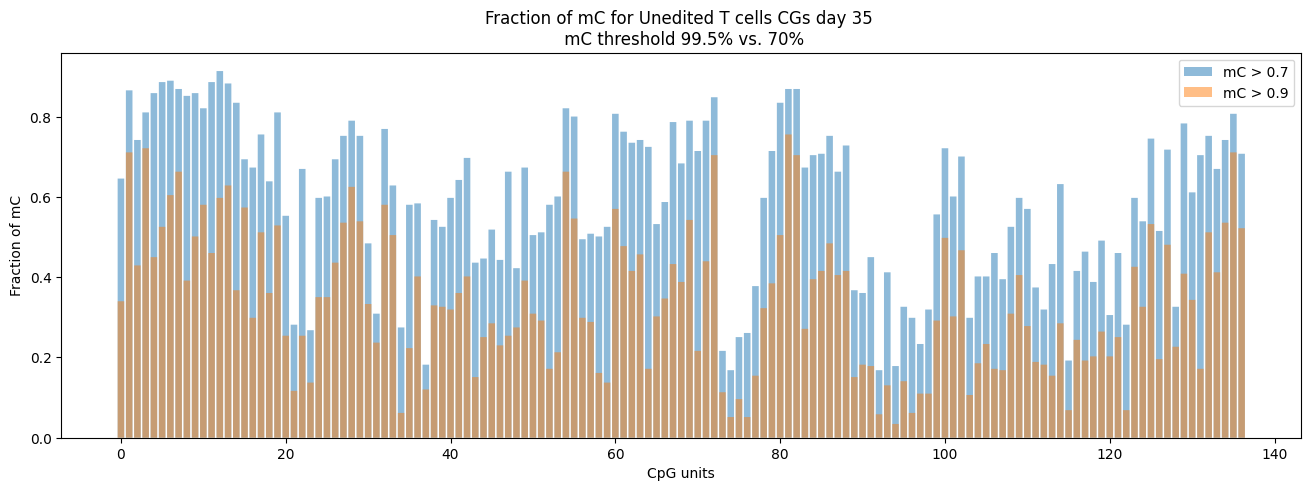

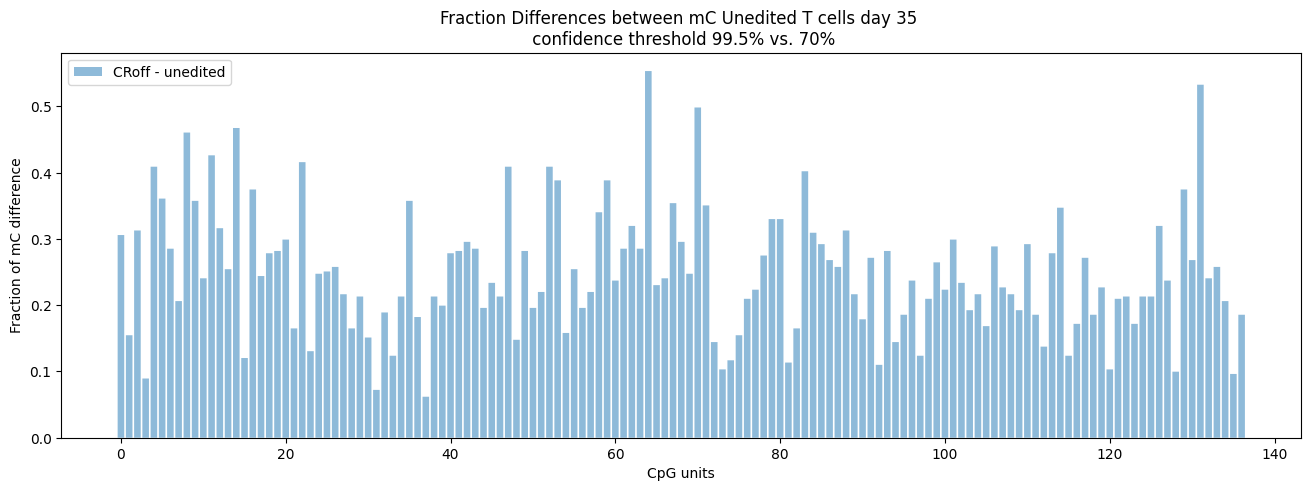

In [27]:
CGs_D28_pd = CGs_D35_CRoff_mc0995
CGs_D28_unedited_0995_remove_low80_sums = np.nansum(CGs_D28_pd, axis=0) 
CGs_D28_unedited_0995_remove_low80_frac = CGs_D28_unedited_0995_remove_low80_sums  / len(CGs_D28_pd) 

CGs_D28_pd = CGs_D35_CRoff_mc07
CGs_D28_CRoff_0995_remove_low80_sums = np.nansum(CGs_D28_pd, axis=0) 
CGs_D28_CRoff_0995_remove_low80_frac = CGs_D28_CRoff_0995_remove_low80_sums  / len(CGs_D28_pd) 

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D28_CRoff_0995_remove_low80_frac)), CGs_D28_CRoff_0995_remove_low80_frac, snap=False, alpha=0.5, label='mC > 0.7')
plt.bar(np.arange(len(CGs_D28_unedited_0995_remove_low80_frac)), CGs_D28_unedited_0995_remove_low80_frac, snap=False, alpha=0.5, label='mC > 0.9')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited T cells CGs day 35 \n mC threshold 99.5% vs. 70%')
plt.legend()
# Show the plot
plt.show()

# DIFFERENCES

dif_mCthresh_CRoff_unedit_0995 = CGs_D28_CRoff_0995_remove_low80_frac - CGs_D28_unedited_0995_remove_low80_frac

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_mCthresh_CRoff_unedit_0995)), dif_mCthresh_CRoff_unedit_0995, snap=False, alpha=0.5, label='CRoff - unedited' )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells day 35 \n confidence threshold 99.5% vs. 70%')
plt.legend()

# Show the plot
plt.show()

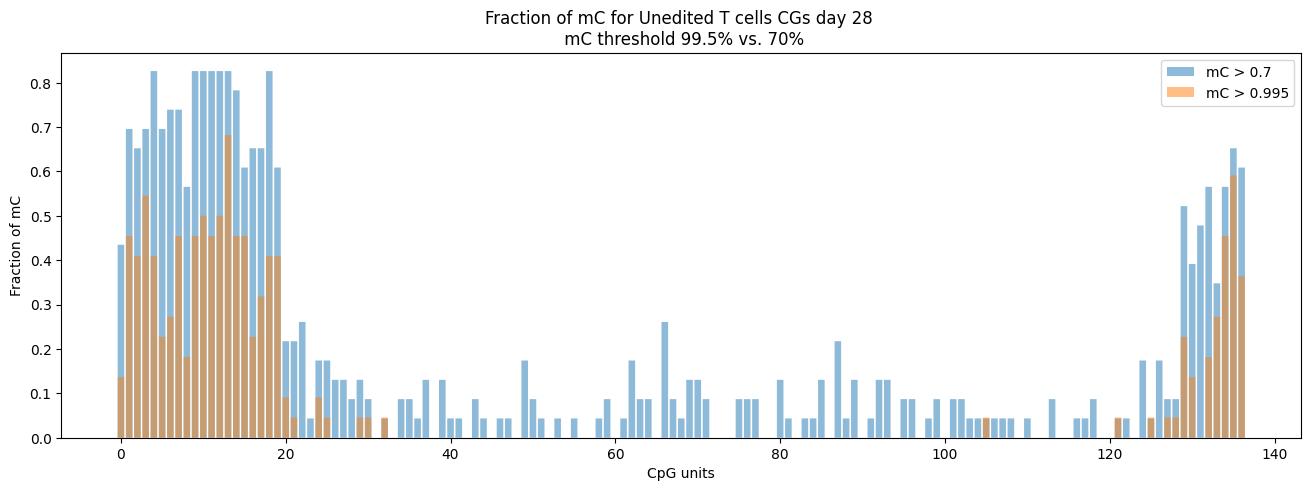

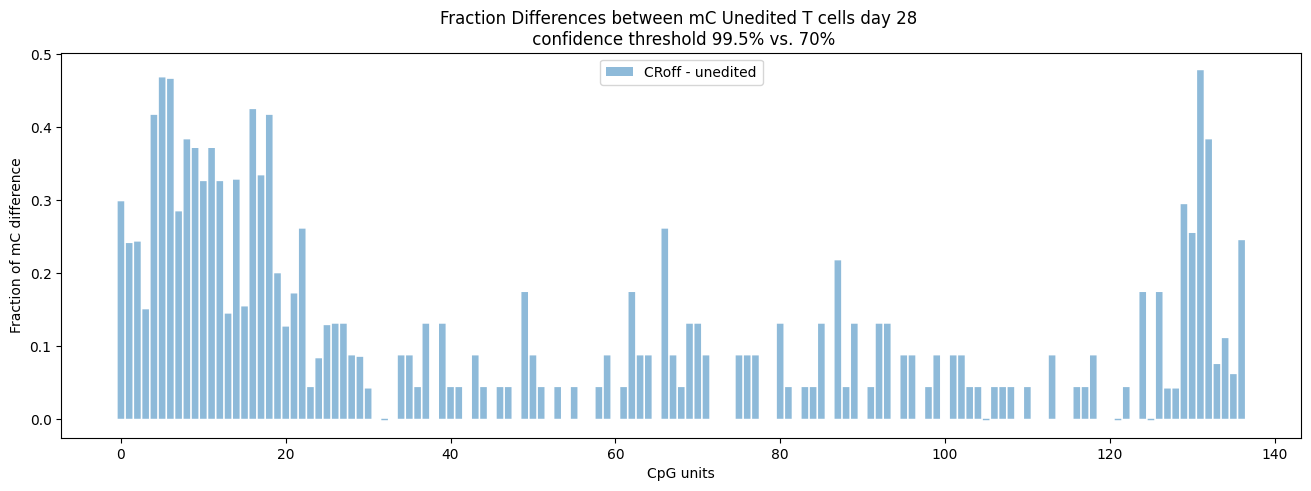

In [26]:
CGs_D28_pd = CGs_D28_unedited_mc0995
CGs_D28_unedited_0995_remove_low80_sums = np.nansum(CGs_D28_pd, axis=0) 
CGs_D28_unedited_0995_remove_low80_frac = CGs_D28_unedited_0995_remove_low80_sums  / len(CGs_D28_pd) 

CGs_D28_pd = CGs_D28_unedited_mc07
CGs_D28_CRoff_0995_remove_low80_sums = np.nansum(CGs_D28_pd, axis=0) 
CGs_D28_CRoff_0995_remove_low80_frac = CGs_D28_CRoff_0995_remove_low80_sums  / len(CGs_D28_pd) 

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D28_CRoff_0995_remove_low80_frac)), CGs_D28_CRoff_0995_remove_low80_frac, snap=False, alpha=0.5, label='mC > 0.7')
plt.bar(np.arange(len(CGs_D28_unedited_0995_remove_low80_frac)), CGs_D28_unedited_0995_remove_low80_frac, snap=False, alpha=0.5, label='mC > 0.995')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited T cells CGs day 28 \n mC threshold 99.5% vs. 70%')
plt.legend()
# Show the plot
plt.show()

# DIFFERENCES

dif_mCthresh_CRoff_unedit_0995 = CGs_D28_CRoff_0995_remove_low80_frac - CGs_D28_unedited_0995_remove_low80_frac

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_mCthresh_CRoff_unedit_0995)), dif_mCthresh_CRoff_unedit_0995, snap=False, alpha=0.5, label='CRoff - unedited' )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells day 28 \n confidence threshold 99.5% vs. 70%')
plt.legend()

# Show the plot
plt.show()

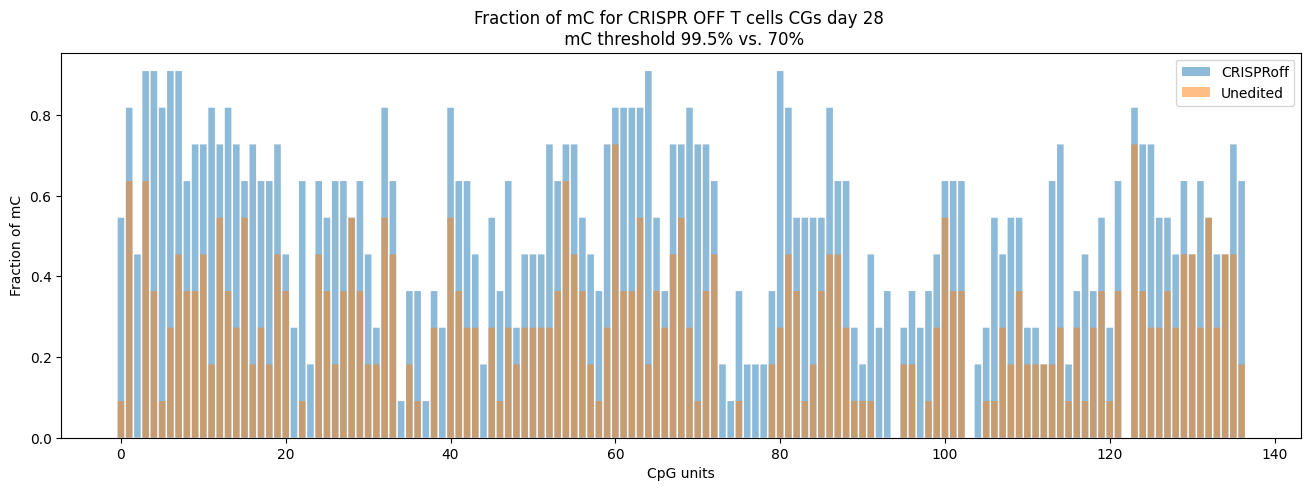

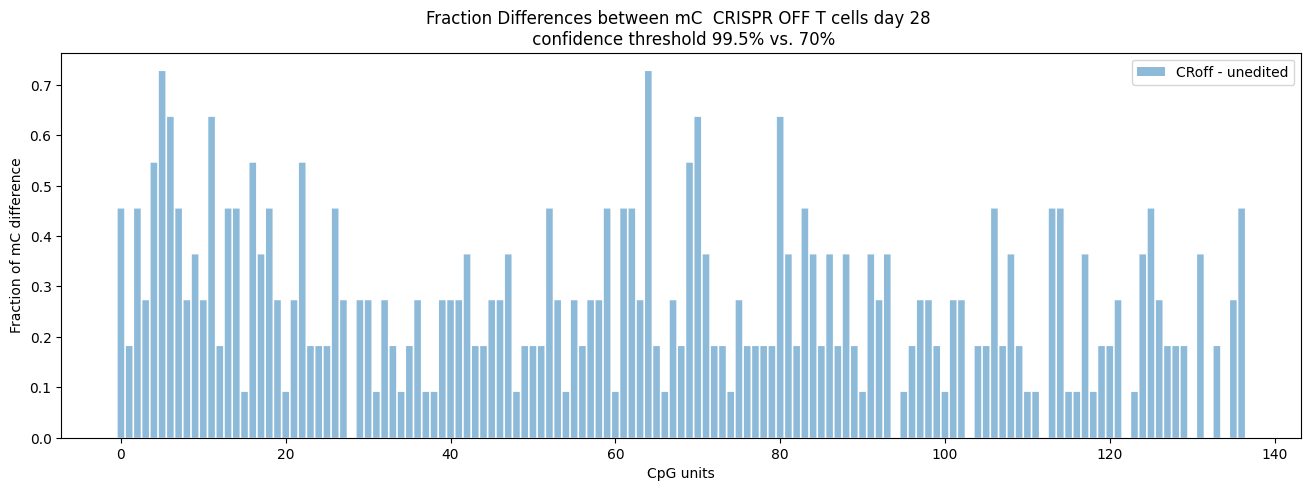

In [19]:
CGs_D28_pd = CGs_D28_CRoff_mc0995
CGs_D28_unedited_0995_remove_low80_sums = np.nansum(CGs_D28_pd, axis=0) 
CGs_D28_unedited_0995_remove_low80_frac = CGs_D28_unedited_0995_remove_low80_sums  / len(CGs_D28_pd) 

CGs_D28_pd = CGs_D28_CRoff_mc07
CGs_D28_CRoff_0995_remove_low80_sums = np.nansum(CGs_D28_pd, axis=0) 
CGs_D28_CRoff_0995_remove_low80_frac = CGs_D28_CRoff_0995_remove_low80_sums  / len(CGs_D28_pd) 

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D28_CRoff_0995_remove_low80_frac)), CGs_D28_CRoff_0995_remove_low80_frac, snap=False, alpha=0.5, label='CRISPRoff')
plt.bar(np.arange(len(CGs_D28_unedited_0995_remove_low80_frac)), CGs_D28_unedited_0995_remove_low80_frac, snap=False, alpha=0.5, label='Unedited')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for CRISPR OFF T cells CGs day 28 \n mC threshold 99.5% vs. 70%')
plt.legend()
# Show the plot
plt.show()

# DIFFERENCES

dif_mCthresh_CRoff_unedit_0995 = CGs_D28_CRoff_0995_remove_low80_frac - CGs_D28_unedited_0995_remove_low80_frac

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_mCthresh_CRoff_unedit_0995)), dif_mCthresh_CRoff_unedit_0995, snap=False, alpha=0.5, label='CRoff - unedited' )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC  CRISPR OFF T cells day 28 \n confidence threshold 99.5% vs. 70%')
plt.legend()

# Show the plot
plt.show()

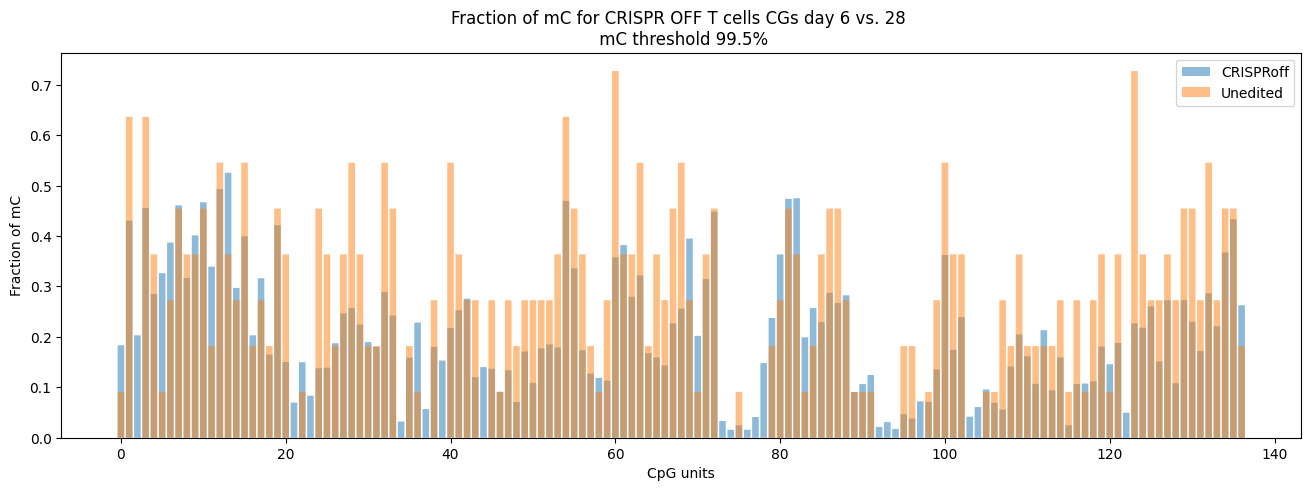

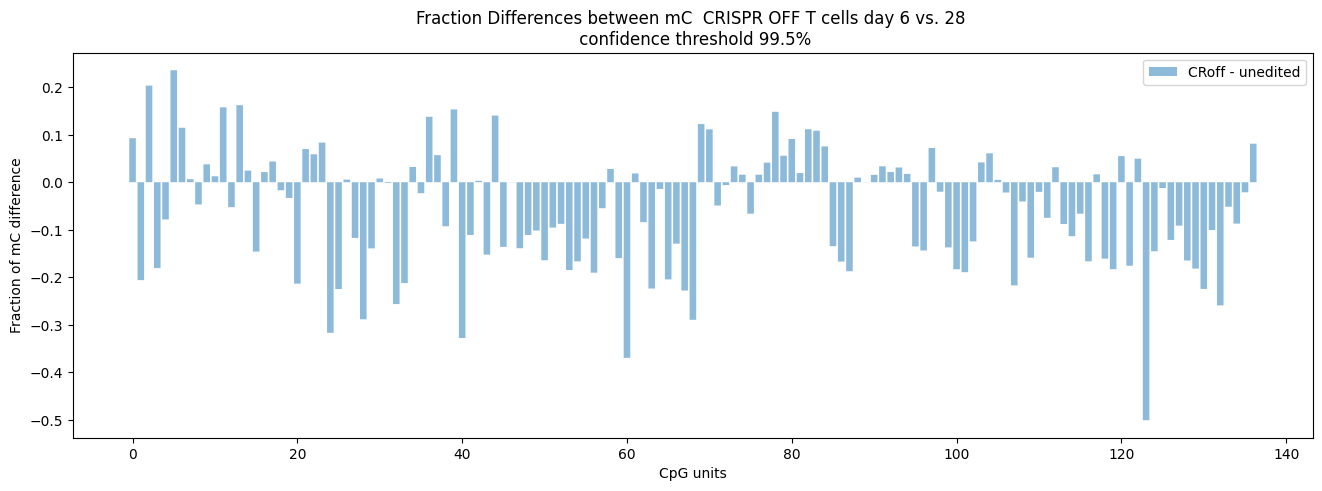

In [20]:
CGs_D28_pd = CGs_D28_CRoff_mc0995
CGs_D28_unedited_0995_remove_low80_sums = np.nansum(CGs_D28_pd, axis=0) 
CGs_D28_unedited_0995_remove_low80_frac = CGs_D28_unedited_0995_remove_low80_sums  / len(CGs_D28_pd) 

CGs_D28_pd = CGs_D6_CRoff_mc0995
CGs_D28_CRoff_0995_remove_low80_sums = np.nansum(CGs_D28_pd, axis=0) 
CGs_D28_CRoff_0995_remove_low80_frac = CGs_D28_CRoff_0995_remove_low80_sums  / len(CGs_D28_pd) 

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D28_CRoff_0995_remove_low80_frac)), CGs_D28_CRoff_0995_remove_low80_frac, snap=False, alpha=0.5, label='CRISPRoff')
plt.bar(np.arange(len(CGs_D28_unedited_0995_remove_low80_frac)), CGs_D28_unedited_0995_remove_low80_frac, snap=False, alpha=0.5, label='Unedited')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for CRISPR OFF T cells CGs day 6 vs. 28 \n mC threshold 99.5%')
plt.legend()
# Show the plot
plt.show()

# DIFFERENCES

dif_mCthresh_CRoff_unedit_0995 = CGs_D28_CRoff_0995_remove_low80_frac - CGs_D28_unedited_0995_remove_low80_frac

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_mCthresh_CRoff_unedit_0995)), dif_mCthresh_CRoff_unedit_0995, snap=False, alpha=0.5, label='CRoff - unedited' )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC  CRISPR OFF T cells day 6 vs. 28 \n confidence threshold 99.5%')
plt.legend()

# Show the plot
plt.show()

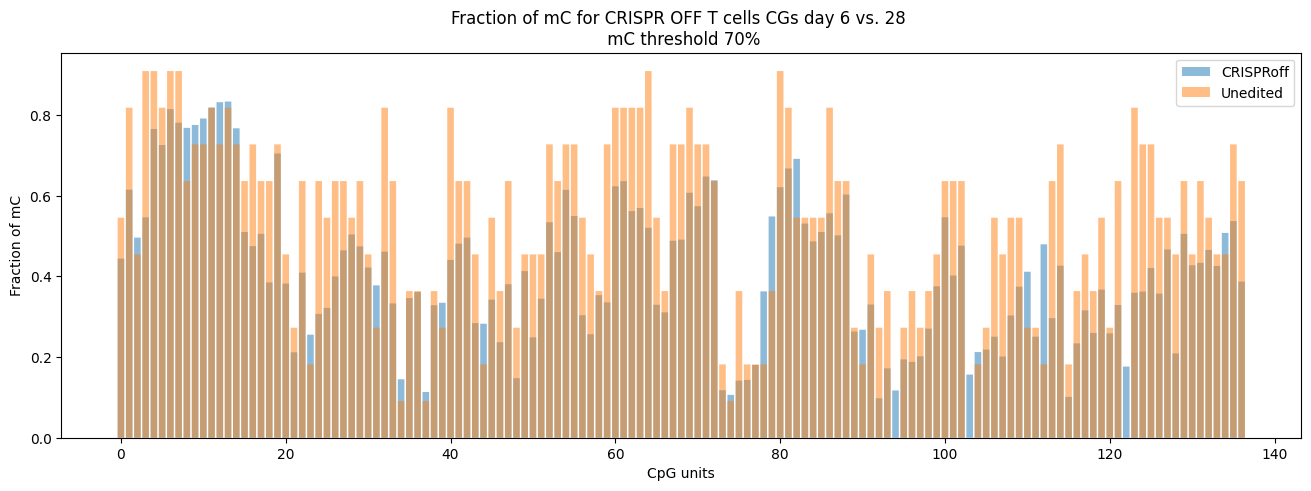

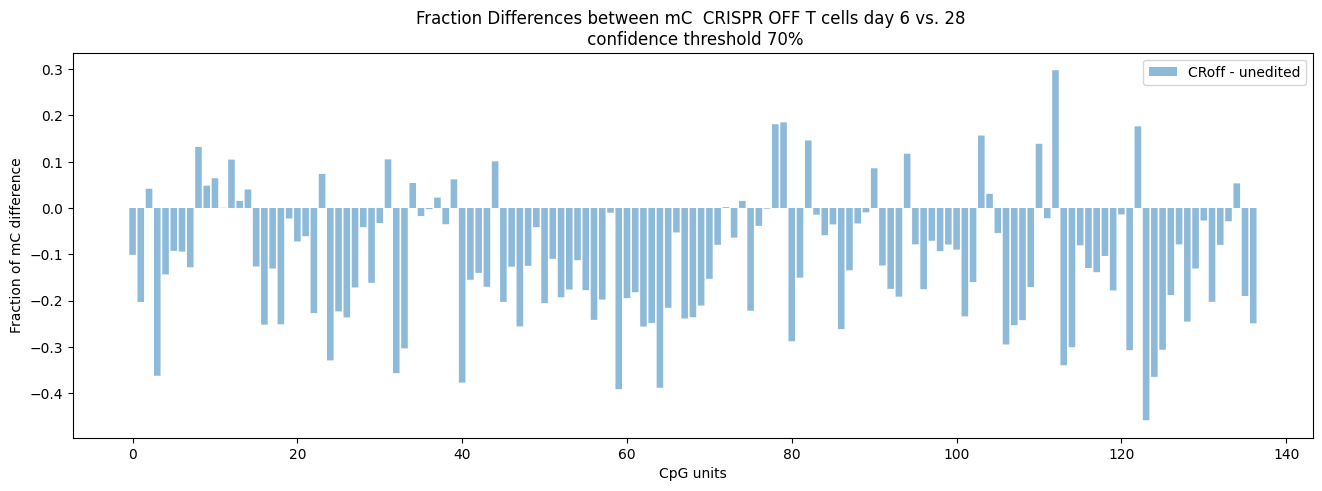

In [21]:


CGs_D28_pd = CGs_D28_CRoff_mc07
CGs_D28_unedited_0995_remove_low80_sums = np.nansum(CGs_D28_pd, axis=0) 
CGs_D28_unedited_0995_remove_low80_frac = CGs_D28_unedited_0995_remove_low80_sums  / len(CGs_D28_pd) 

CGs_D28_pd = CGs_D6_CRoff_mc07
CGs_D28_CRoff_0995_remove_low80_sums = np.nansum(CGs_D28_pd, axis=0) 
CGs_D28_CRoff_0995_remove_low80_frac = CGs_D28_CRoff_0995_remove_low80_sums  / len(CGs_D28_pd) 

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D28_CRoff_0995_remove_low80_frac)), CGs_D28_CRoff_0995_remove_low80_frac, snap=False, alpha=0.5, label='CRISPRoff')
plt.bar(np.arange(len(CGs_D28_unedited_0995_remove_low80_frac)), CGs_D28_unedited_0995_remove_low80_frac, snap=False, alpha=0.5, label='Unedited')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for CRISPR OFF T cells CGs day 6 vs. 28 \n mC threshold 70%')
plt.legend()
# Show the plot
plt.show()

# DIFFERENCES

dif_mCthresh_CRoff_unedit_0995 = CGs_D28_CRoff_0995_remove_low80_frac - CGs_D28_unedited_0995_remove_low80_frac

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_mCthresh_CRoff_unedit_0995)), dif_mCthresh_CRoff_unedit_0995, snap=False, alpha=0.5, label='CRoff - unedited' )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC  CRISPR OFF T cells day 6 vs. 28 \n confidence threshold 70%')
plt.legend()

# Show the plot
plt.show()


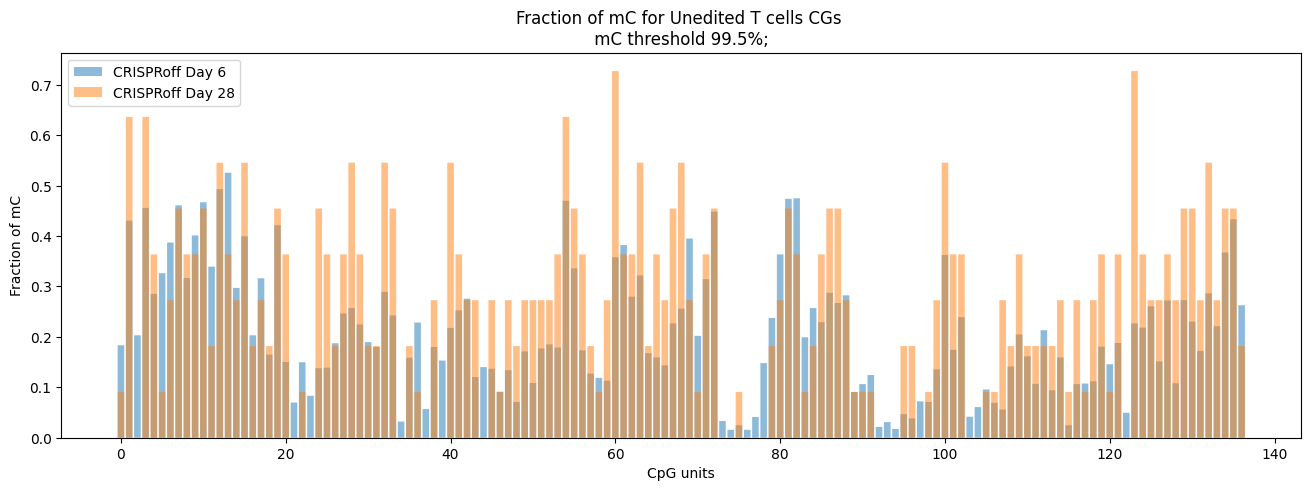

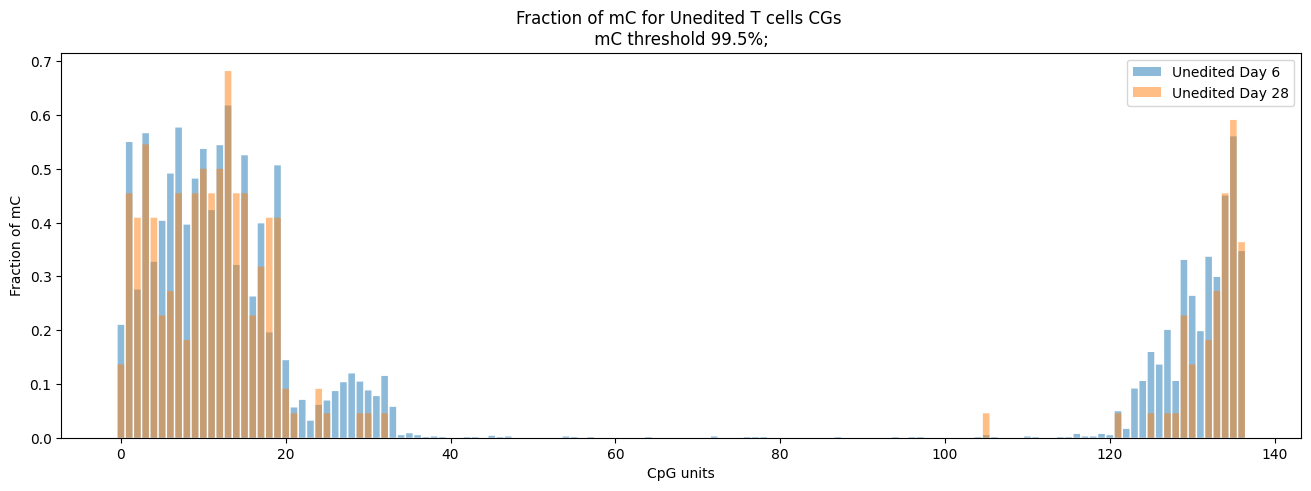

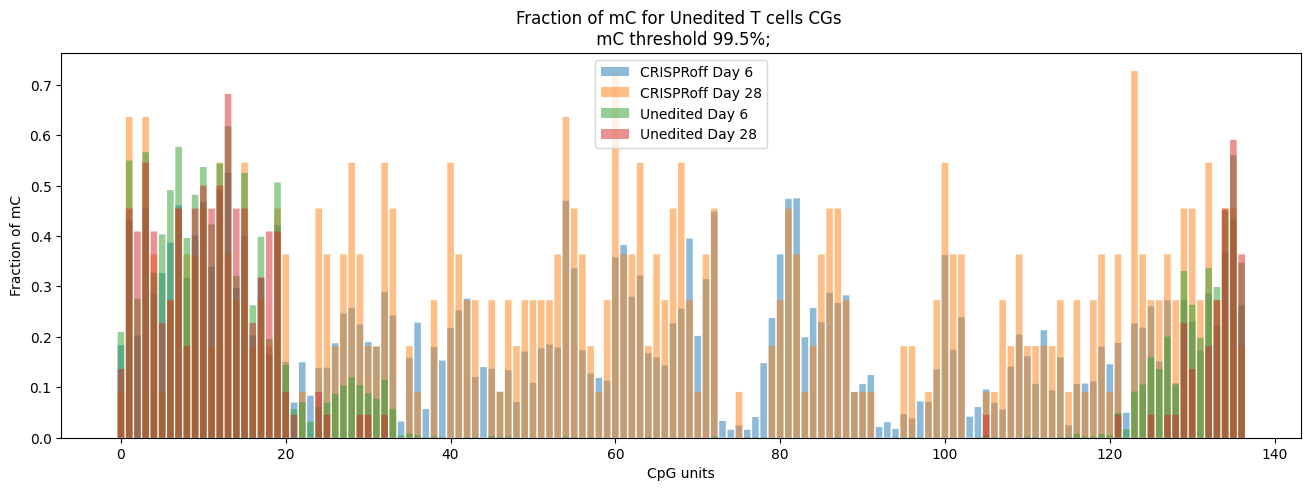

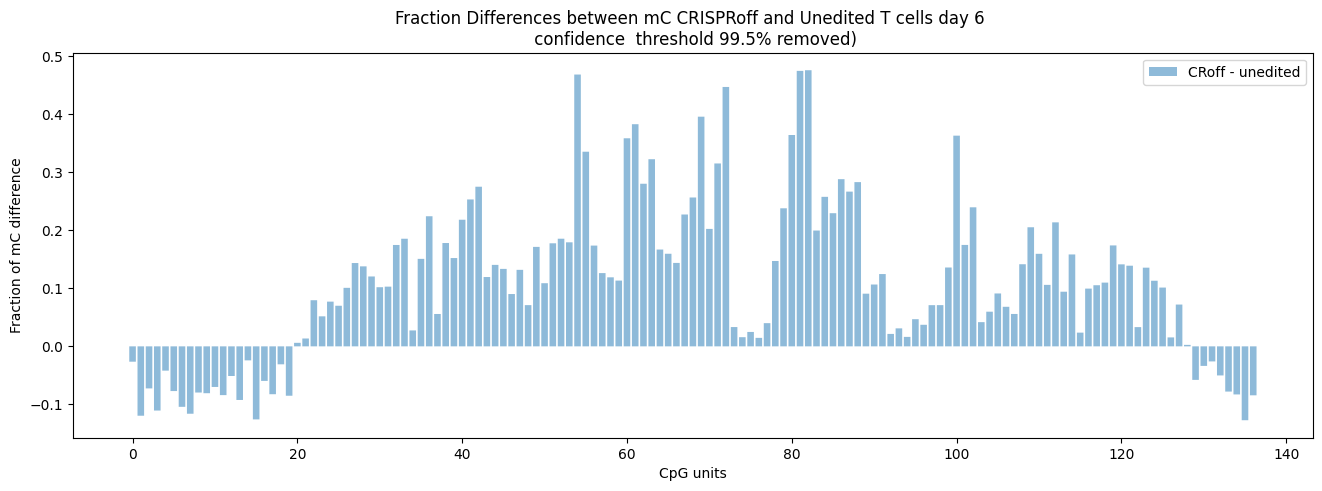

In [22]:
CGs_D6_pd = CGs_D6_unedited_mc0995 
CGs_D6_unedited_0995_remove_low80_sums = np.nansum(CGs_D6_pd, axis=0) 
CGs_D6_unedited_0995_remove_low80_frac = CGs_D6_unedited_0995_remove_low80_sums  / len(CGs_D6_pd) 

CGs_D6_pd = CGs_D6_CRoff_mc0995 
CGs_D6_CRoff_0995_remove_low80_sums = np.nansum(CGs_D6_pd, axis=0) 
CGs_D6_CRoff_0995_remove_low80_frac = CGs_D6_CRoff_0995_remove_low80_sums  / len(CGs_D6_pd) 

CGs_D28_pd = CGs_D28_unedited_mc0995 
CGs_D28_unedited_0995_remove_low80_sums = np.nansum(CGs_D28_pd, axis=0) 
CGs_D28_unedited_0995_remove_low80_frac = CGs_D28_unedited_0995_remove_low80_sums  / len(CGs_D28_pd) 

CGs_D28_pd = CGs_D28_CRoff_mc0995 
CGs_D28_CRoff_0995_remove_low80_sums = np.nansum(CGs_D28_pd, axis=0) 
CGs_D28_CRoff_0995_remove_low80_frac = CGs_D28_CRoff_0995_remove_low80_sums  / len(CGs_D28_pd) 


plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D6_CRoff_0995_remove_low80_frac)), CGs_D6_CRoff_0995_remove_low80_frac, snap=False, alpha=0.5, label='CRISPRoff Day 6')
plt.bar(np.arange(len(CGs_D28_CRoff_0995_remove_low80_frac)), CGs_D28_CRoff_0995_remove_low80_frac, snap=False, alpha=0.5, label='CRISPRoff Day 28')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited T cells CGs \n mC threshold 99.5%; ')
plt.legend()
# Show the plot
plt.show()
plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D6_unedited_0995_remove_low80_frac)), CGs_D6_unedited_0995_remove_low80_frac, snap=False, alpha=0.5, label='Unedited Day 6')
plt.bar(np.arange(len(CGs_D28_unedited_0995_remove_low80_frac)), CGs_D28_unedited_0995_remove_low80_frac, snap=False, alpha=0.5, label='Unedited Day 28')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited T cells CGs \n mC threshold 99.5%; ')
plt.legend()
# Show the plot
plt.show()


plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D6_CRoff_0995_remove_low80_frac)), CGs_D6_CRoff_0995_remove_low80_frac, snap=False, alpha=0.5, label='CRISPRoff Day 6')
plt.bar(np.arange(len(CGs_D28_CRoff_0995_remove_low80_frac)), CGs_D28_CRoff_0995_remove_low80_frac, snap=False, alpha=0.5, label='CRISPRoff Day 28')

plt.bar(np.arange(len(CGs_D6_unedited_0995_remove_low80_frac)), CGs_D6_unedited_0995_remove_low80_frac, snap=False, alpha=0.5, label='Unedited Day 6')
plt.bar(np.arange(len(CGs_D28_unedited_0995_remove_low80_frac)), CGs_D28_unedited_0995_remove_low80_frac, snap=False, alpha=0.5, label='Unedited Day 28')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited T cells CGs \n mC threshold 99.5%;')
plt.legend()
# Show the plot
plt.show()

# DIFFERENCES

dif_mCthresh_CRoff_unedit_0995 = CGs_D6_CRoff_0995_remove_low80_frac - CGs_D6_unedited_0995_remove_low80_frac

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_mCthresh_CRoff_unedit_0995)), dif_mCthresh_CRoff_unedit_0995, snap=False, alpha=0.5, label='CRoff - unedited' )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC CRISPRoff and Unedited T cells day 6 \n confidence  threshold 99.5% removed)')
plt.legend()

# Show the plot
plt.show()

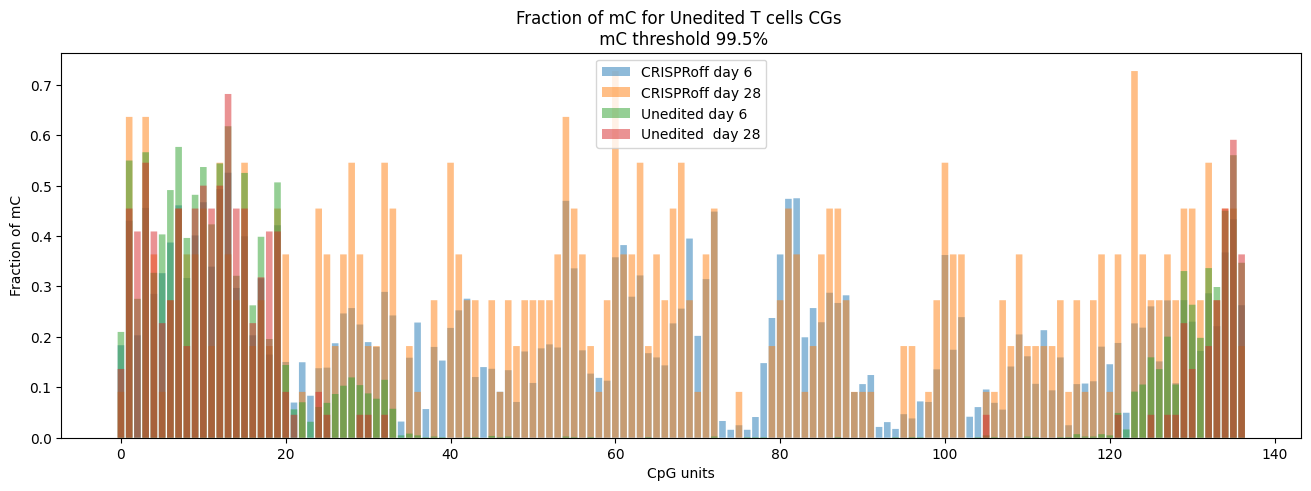

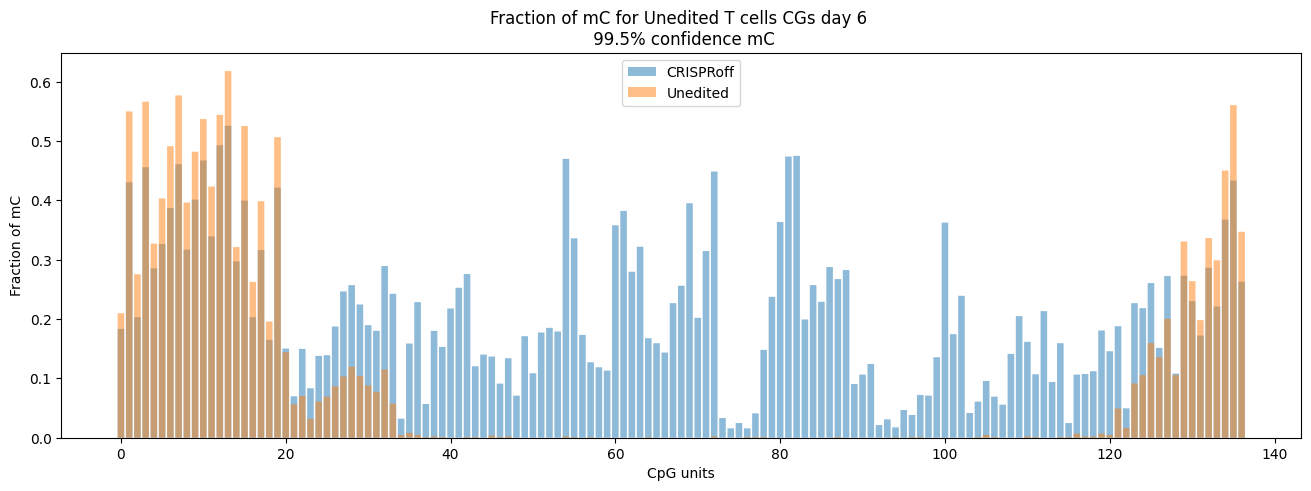

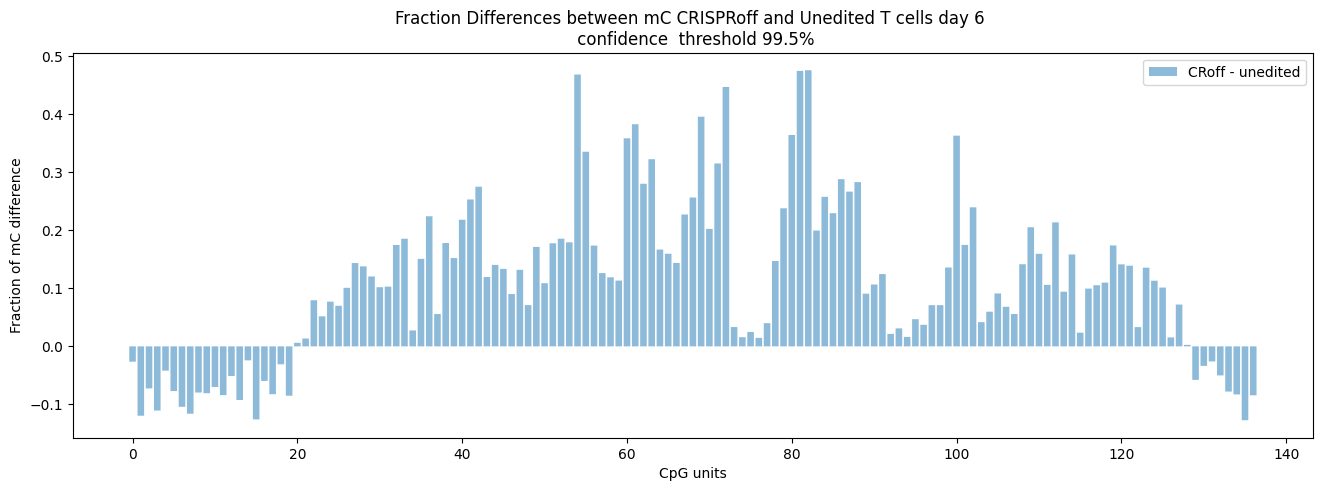

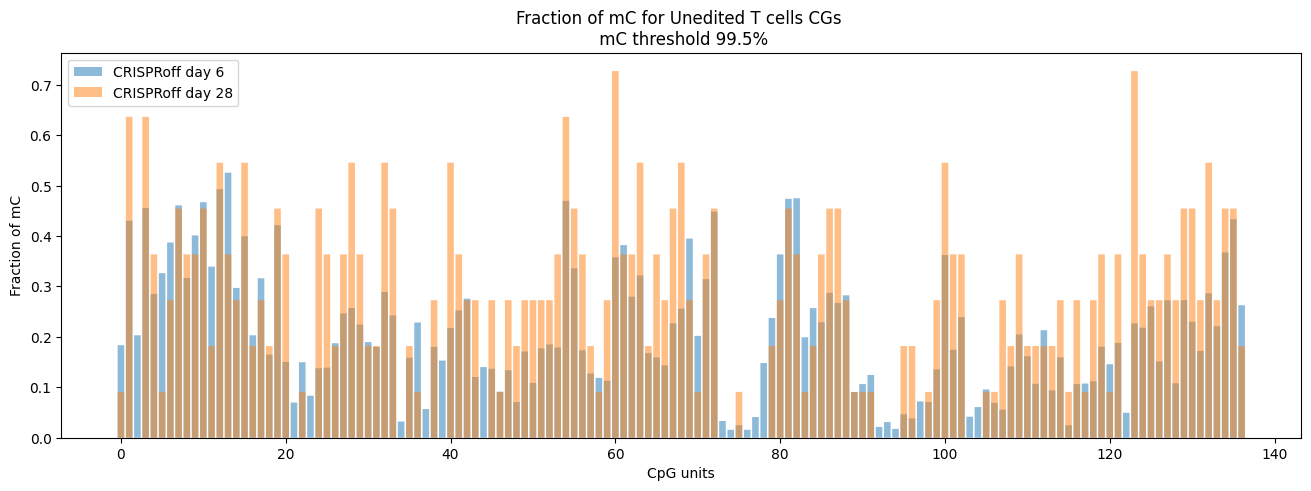

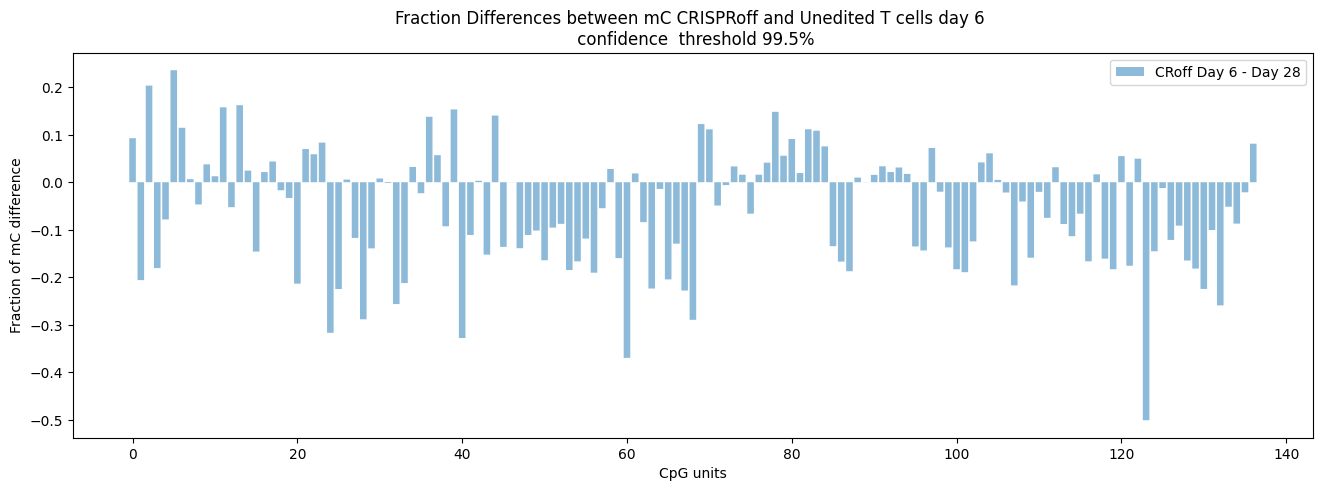

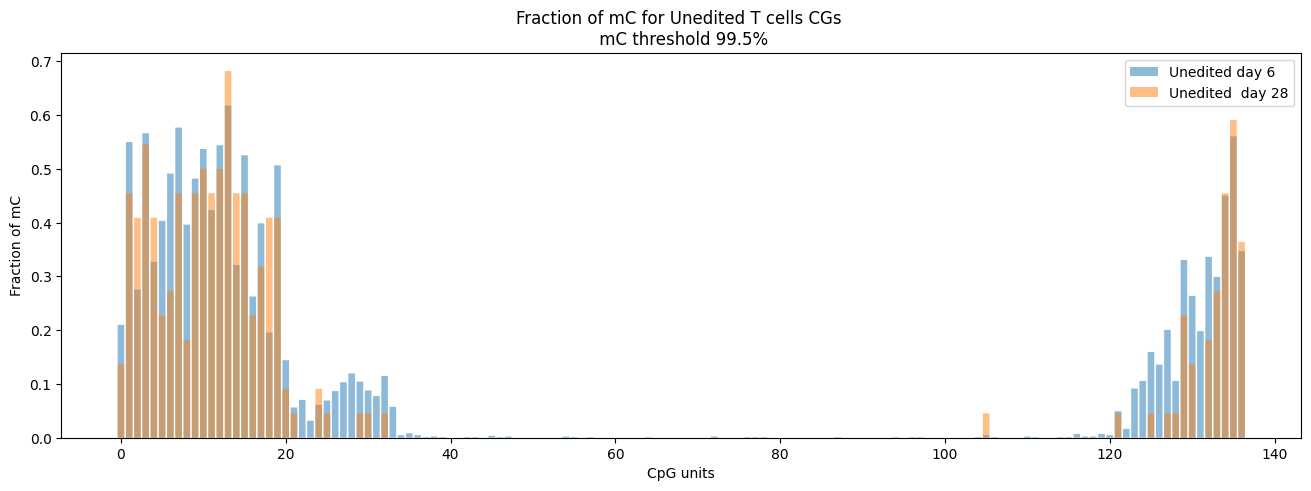

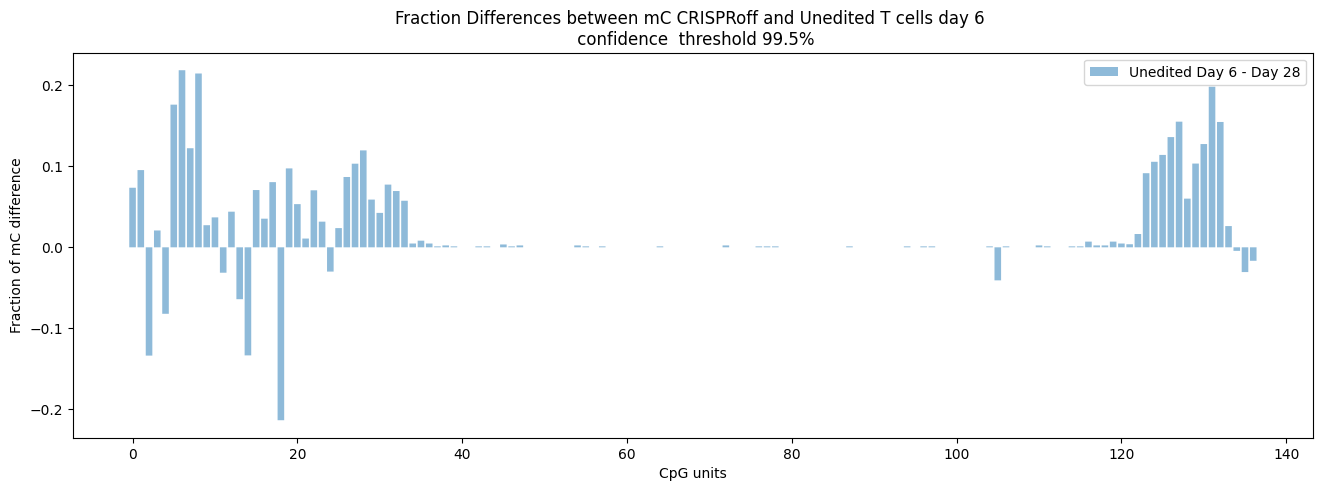

In [33]:
CGs_pd = CGs_D6_unedited_mc0995
CGs_D6_unedited_0995_remove_low70_sums = np.nansum(CGs_pd, axis=0) 
CGs_D6_unedited_0995_remove_low70_frac = CGs_D6_unedited_0995_remove_low70_sums  / len(CGs_pd) 


CGs_pd = CGs_D6_CRoff_mc0995
CGs_D6_CRoff_0995_remove_low70_sums = np.nansum(CGs_pd, axis=0) 
CGs_D6_CRoff_0995_remove_low70_frac = CGs_D6_CRoff_0995_remove_low70_sums  / len(CGs_pd) 

CGs_pd = CGs_D28_unedited_mc0995
CGs_D28_unedited_0995_remove_low70_sums = np.nansum(CGs_pd, axis=0) 
CGs_D28_unedited_0995_remove_low70_frac = CGs_D28_unedited_0995_remove_low70_sums  / len(CGs_pd) 


CGs_pd = CGs_D28_CRoff_mc0995
CGs_D28_CRoff_0995_remove_low70_sums = np.nansum(CGs_pd, axis=0) 
CGs_D28_CRoff_0995_remove_low70_frac = CGs_D28_CRoff_0995_remove_low70_sums  / len(CGs_pd) 



# --------- ALL Together ---------------

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D6_CRoff_0995_remove_low70_frac)), CGs_D6_CRoff_0995_remove_low70_frac, snap=False, alpha=0.5, label='CRISPRoff day 6')
plt.bar(np.arange(len(CGs_D28_CRoff_0995_remove_low70_frac)), CGs_D28_CRoff_0995_remove_low70_frac, snap=False, alpha=0.5, label='CRISPRoff day 28')

plt.bar(np.arange(len(CGs_D6_unedited_0995_remove_low70_frac)), CGs_D6_unedited_0995_remove_low70_frac, snap=False, alpha=0.5, label='Unedited day 6')
plt.bar(np.arange(len(CGs_D28_unedited_0995_remove_low70_frac)), CGs_D28_unedited_0995_remove_low70_frac, snap=False, alpha=0.5, label='Unedited  day 28')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited T cells CGs \n mC threshold 99.5%')
plt.legend()
# Show the plot
plt.show()

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D6_CRoff_0995_remove_low70_frac)), CGs_D6_CRoff_0995_remove_low70_frac, snap=False, alpha=0.5, label='CRISPRoff')
plt.bar(np.arange(len(CGs_D6_unedited_0995_remove_low70_frac)), CGs_D6_unedited_0995_remove_low70_frac, snap=False, alpha=0.5, label='Unedited')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited T cells CGs day 6 \n 99.5% confidence mC')
plt.legend()
# Show the plot
plt.show()

# DIFFERENCES
dif_mCthresh_CRoff_unedit_0995 = CGs_D6_CRoff_0995_remove_low70_frac - CGs_D6_unedited_0995_remove_low70_frac

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_mCthresh_CRoff_unedit_0995)), dif_mCthresh_CRoff_unedit_0995, snap=False, alpha=0.5, label='CRoff - unedited' )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC CRISPRoff and Unedited T cells day 6 \n confidence  threshold 99.5%')
plt.legend()

# Show the plot
plt.show()



plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D6_CRoff_0995_remove_low70_frac)), CGs_D6_CRoff_0995_remove_low70_frac, snap=False, alpha=0.5, label='CRISPRoff day 6')
plt.bar(np.arange(len(CGs_D28_CRoff_0995_remove_low70_frac)), CGs_D28_CRoff_0995_remove_low70_frac, snap=False, alpha=0.5, label='CRISPRoff day 28')
# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited T cells CGs \n mC threshold 99.5%')
plt.legend()
# Show the plot
plt.show()



# DIFFERENCES
dif_mCthresh_CRoff_D6_D28_0995 = CGs_D6_CRoff_0995_remove_low70_frac - CGs_D28_CRoff_0995_remove_low70_frac
plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_mCthresh_CRoff_D6_D28_0995)), dif_mCthresh_CRoff_D6_D28_0995, snap=False, alpha=0.5, label='CRoff Day 6 - Day 28' )
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC CRISPRoff and Unedited T cells day 6 \n confidence  threshold 99.5%')
plt.legend()

# Show the plot
plt.show()

## =--------- UNEDITED Day 6 vs Day 38

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D6_unedited_0995_remove_low70_frac)), CGs_D6_unedited_0995_remove_low70_frac, snap=False, alpha=0.5, label='Unedited day 6')
plt.bar(np.arange(len(CGs_D28_unedited_0995_remove_low70_frac)), CGs_D28_unedited_0995_remove_low70_frac, snap=False, alpha=0.5, label='Unedited  day 28')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited T cells CGs \n mC threshold 99.5%')
plt.legend()
# Show the plot
plt.show()




# DIFFERENCES
dif_mCthresh_unedited_D6_D28_0995 = CGs_D6_unedited_0995_remove_low70_frac - CGs_D28_unedited_0995_remove_low70_frac
plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_mCthresh_unedited_D6_D28_0995)), dif_mCthresh_unedited_D6_D28_0995, snap=False, alpha=0.5, label='Unedited Day 6 - Day 28' )
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC CRISPRoff and Unedited T cells day 6 \n confidence  threshold 99.5%')
plt.legend()




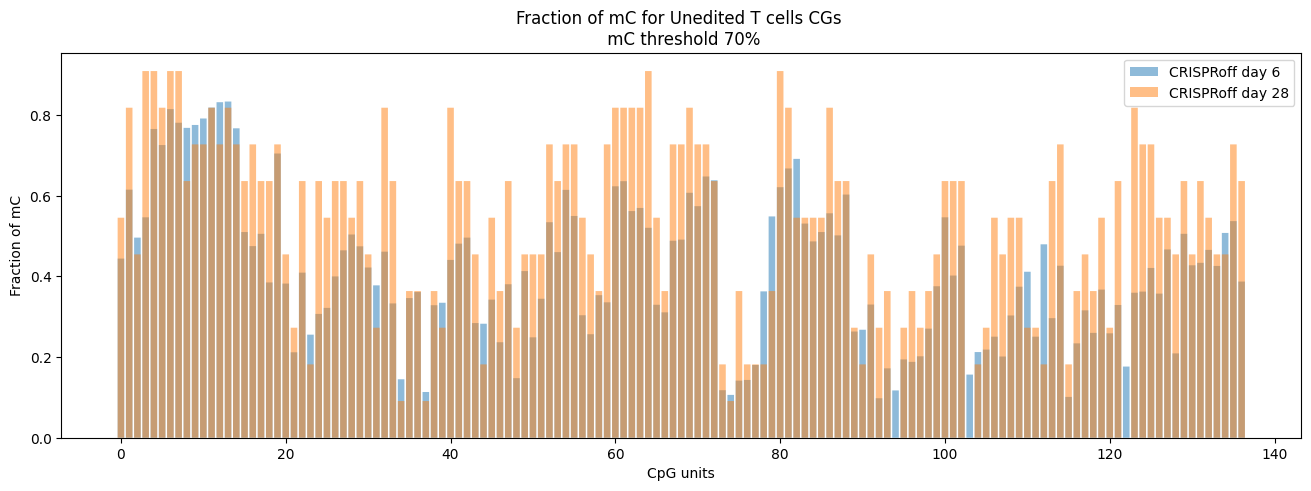

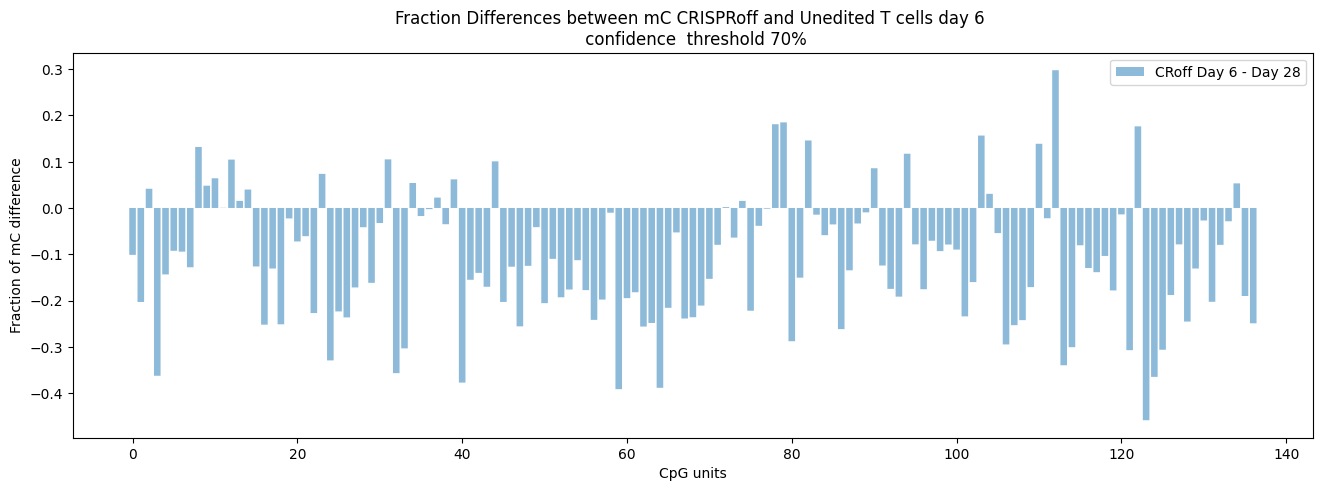

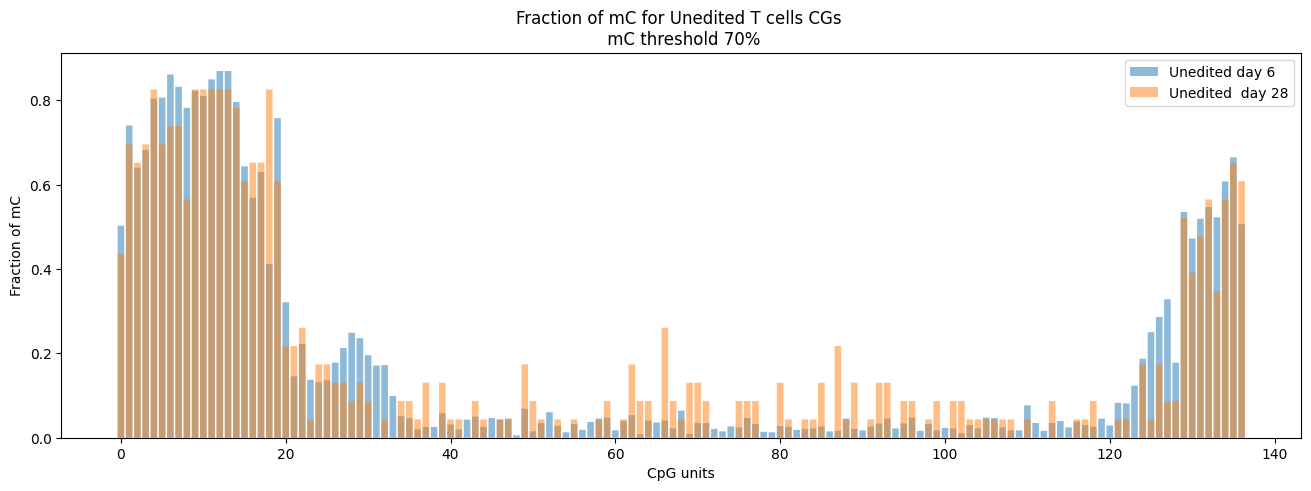

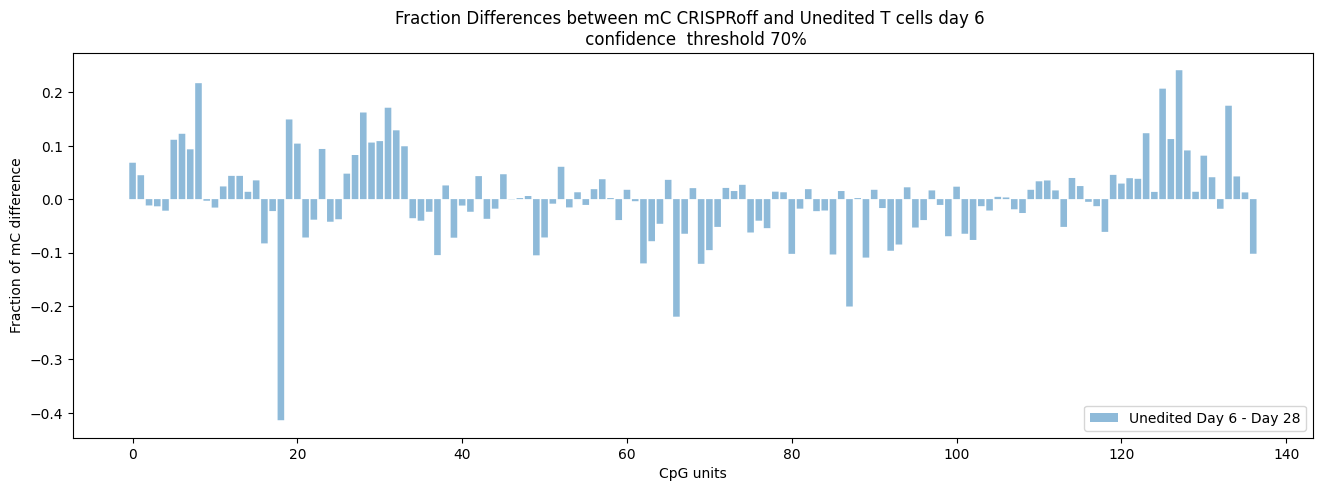

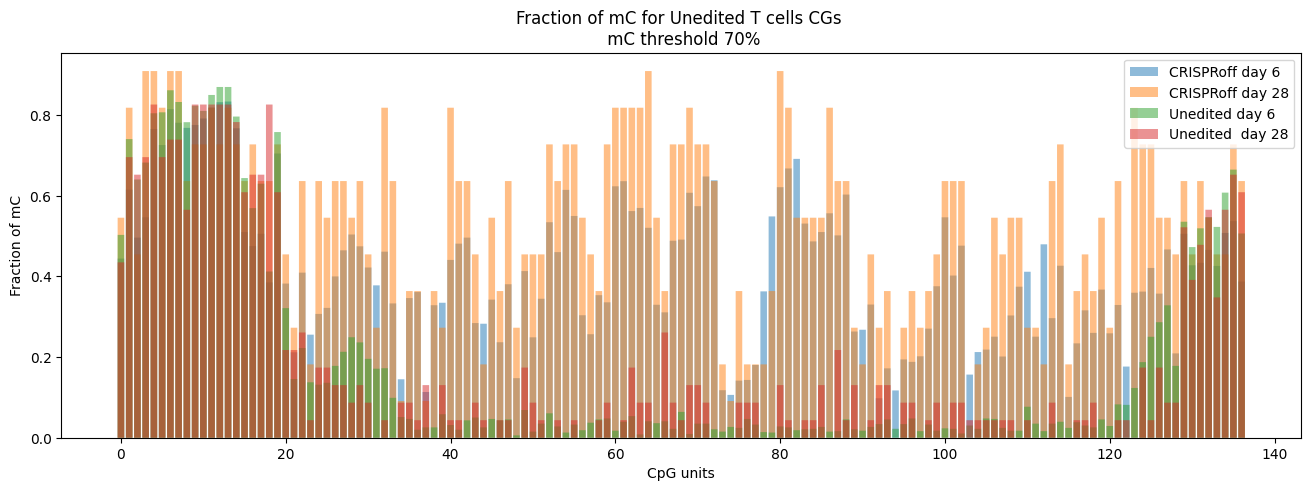

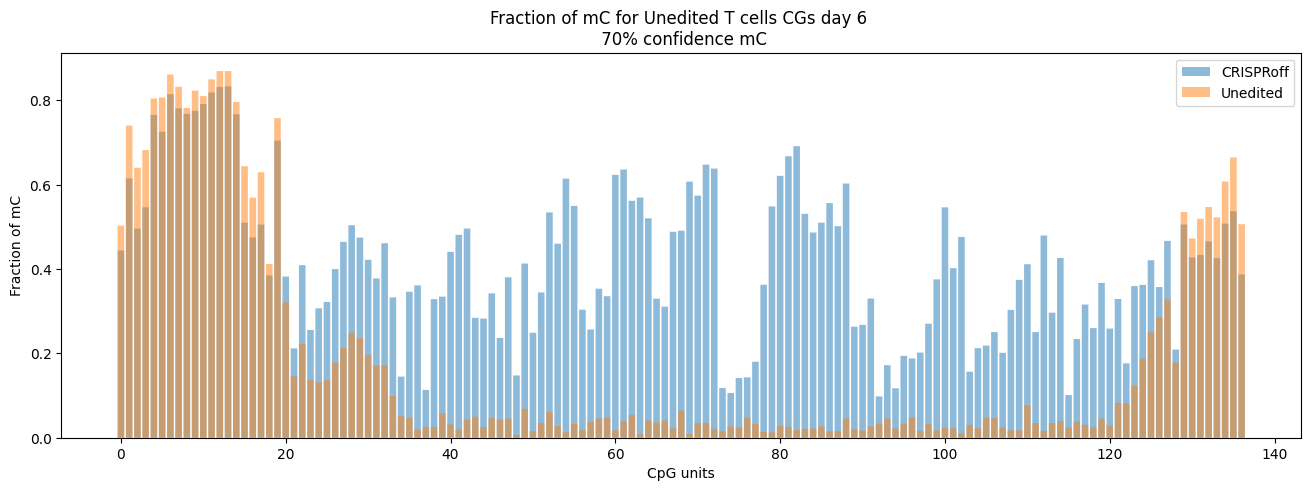

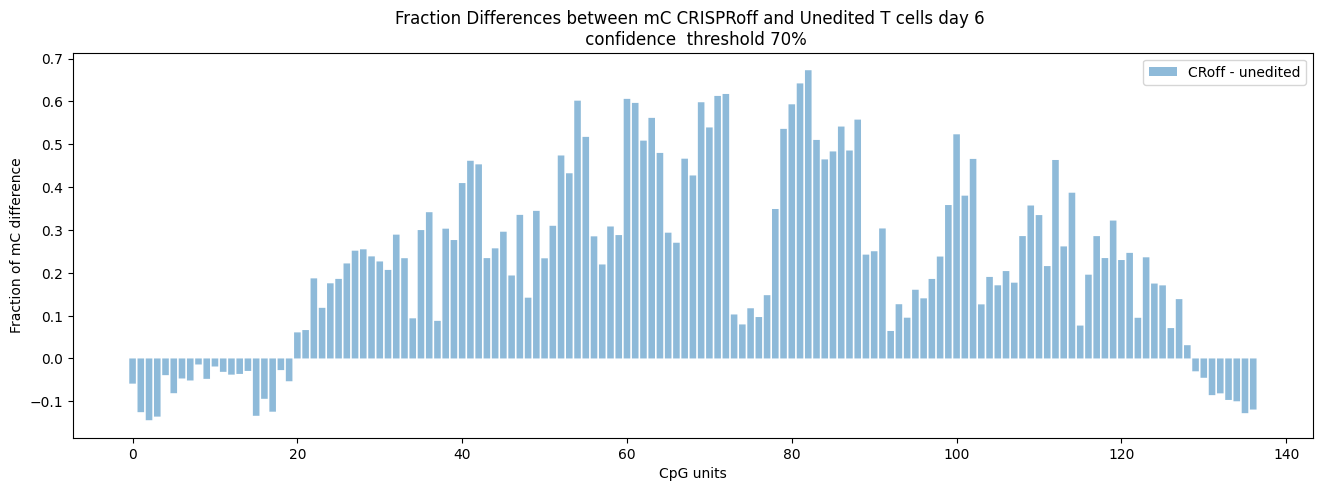

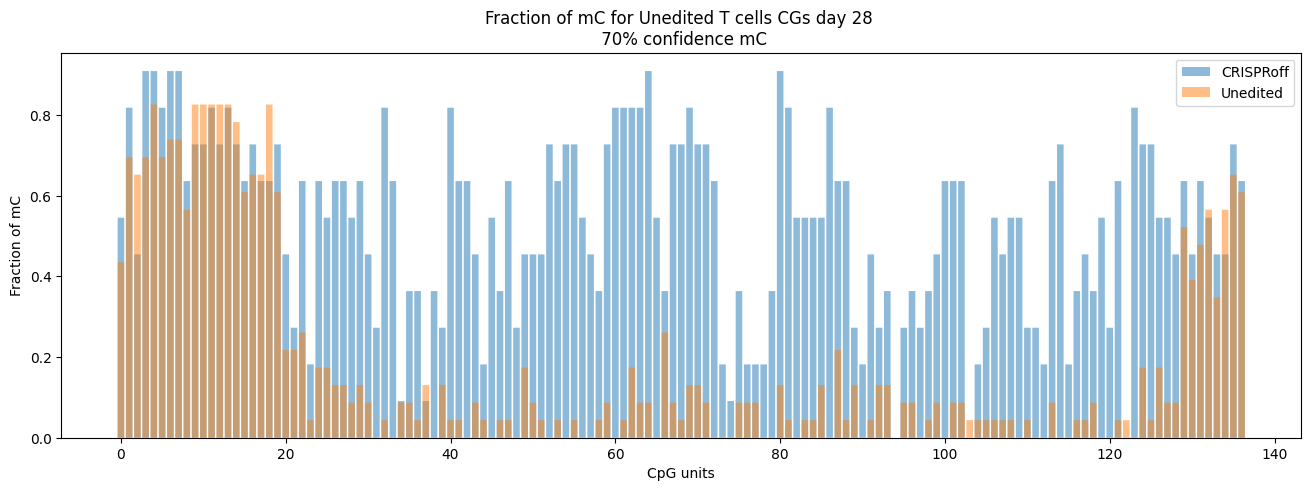

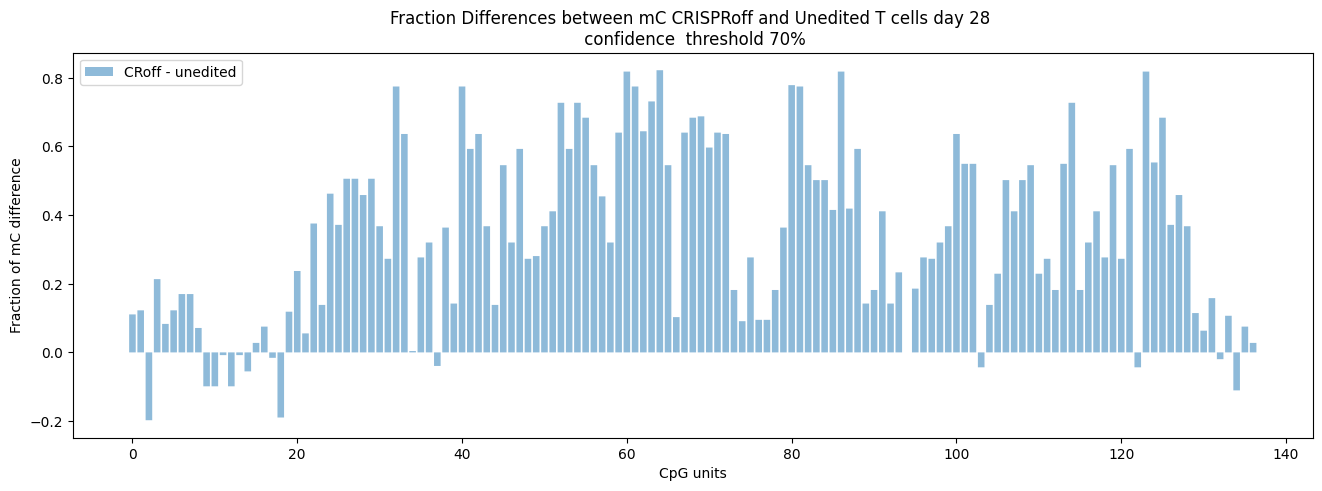

In [27]:
CGs_pd = CGs_D6_unedited_mc07
CGs_D6_unedited_0995_remove_low70_sums = np.nansum(CGs_pd, axis=0) 
CGs_D6_unedited_0995_remove_low70_frac = CGs_D6_unedited_0995_remove_low70_sums  / len(CGs_pd) 


CGs_pd = CGs_D6_CRoff_mc07
CGs_D6_CRoff_0995_remove_low70_sums = np.nansum(CGs_pd, axis=0) 
CGs_D6_CRoff_0995_remove_low70_frac = CGs_D6_CRoff_0995_remove_low70_sums  / len(CGs_pd) 

CGs_pd = CGs_D28_unedited_mc07
CGs_D28_unedited_0995_remove_low70_sums = np.nansum(CGs_pd, axis=0) 
CGs_D28_unedited_0995_remove_low70_frac = CGs_D28_unedited_0995_remove_low70_sums  / len(CGs_pd) 


CGs_pd = CGs_D28_CRoff_mc07
CGs_D28_CRoff_0995_remove_low70_sums = np.nansum(CGs_pd, axis=0) 
CGs_D28_CRoff_0995_remove_low70_frac = CGs_D28_CRoff_0995_remove_low70_sums  / len(CGs_pd) 


plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D6_CRoff_0995_remove_low70_frac)), CGs_D6_CRoff_0995_remove_low70_frac, snap=False, alpha=0.5, label='CRISPRoff day 6')
plt.bar(np.arange(len(CGs_D28_CRoff_0995_remove_low70_frac)), CGs_D28_CRoff_0995_remove_low70_frac, snap=False, alpha=0.5, label='CRISPRoff day 28')
# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited T cells CGs \n mC threshold 70%')
plt.legend()
# Show the plot
plt.show()



# DIFFERENCES
dif_mCthresh_CRoff_D6_D28_0995 = CGs_D6_CRoff_0995_remove_low70_frac - CGs_D28_CRoff_0995_remove_low70_frac
plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_mCthresh_CRoff_D6_D28_0995)), dif_mCthresh_CRoff_D6_D28_0995, snap=False, alpha=0.5, label='CRoff Day 6 - Day 28' )
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC CRISPRoff and Unedited T cells day 6 \n confidence  threshold 70%')
plt.legend()

# Show the plot
plt.show()

## =--------- UNEDITED Day 6 vs Day 38

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D6_unedited_0995_remove_low70_frac)), CGs_D6_unedited_0995_remove_low70_frac, snap=False, alpha=0.5, label='Unedited day 6')
plt.bar(np.arange(len(CGs_D28_unedited_0995_remove_low70_frac)), CGs_D28_unedited_0995_remove_low70_frac, snap=False, alpha=0.5, label='Unedited  day 28')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited T cells CGs \n mC threshold 70%')
plt.legend()
# Show the plot
plt.show()




# DIFFERENCES
dif_mCthresh_unedited_D6_D28_0995 = CGs_D6_unedited_0995_remove_low70_frac - CGs_D28_unedited_0995_remove_low70_frac
plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_mCthresh_unedited_D6_D28_0995)), dif_mCthresh_unedited_D6_D28_0995, snap=False, alpha=0.5, label='Unedited Day 6 - Day 28' )
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC CRISPRoff and Unedited T cells day 6 \n confidence  threshold 70%')
plt.legend()




# --------- ALL Together ---------------

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D6_CRoff_0995_remove_low70_frac)), CGs_D6_CRoff_0995_remove_low70_frac, snap=False, alpha=0.5, label='CRISPRoff day 6')
plt.bar(np.arange(len(CGs_D28_CRoff_0995_remove_low70_frac)), CGs_D28_CRoff_0995_remove_low70_frac, snap=False, alpha=0.5, label='CRISPRoff day 28')

plt.bar(np.arange(len(CGs_D6_unedited_0995_remove_low70_frac)), CGs_D6_unedited_0995_remove_low70_frac, snap=False, alpha=0.5, label='Unedited day 6')
plt.bar(np.arange(len(CGs_D28_unedited_0995_remove_low70_frac)), CGs_D28_unedited_0995_remove_low70_frac, snap=False, alpha=0.5, label='Unedited  day 28')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited T cells CGs \n mC threshold 70%')
plt.legend()
# Show the plot
plt.show()

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D6_CRoff_0995_remove_low70_frac)), CGs_D6_CRoff_0995_remove_low70_frac, snap=False, alpha=0.5, label='CRISPRoff')
plt.bar(np.arange(len(CGs_D6_unedited_0995_remove_low70_frac)), CGs_D6_unedited_0995_remove_low70_frac, snap=False, alpha=0.5, label='Unedited')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited T cells CGs day 6 \n 70% confidence mC')
plt.legend()
# Show the plot
plt.show()

# DIFFERENCES
dif_mCthresh_CRoff_unedit_0995 = CGs_D6_CRoff_0995_remove_low70_frac - CGs_D6_unedited_0995_remove_low70_frac

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_mCthresh_CRoff_unedit_0995)), dif_mCthresh_CRoff_unedit_0995, snap=False, alpha=0.5, label='CRoff - unedited' )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC CRISPRoff and Unedited T cells day 6 \n confidence  threshold 70%')
plt.legend()

# Show the plot
plt.show()

# ----
plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D28_CRoff_0995_remove_low70_frac)), CGs_D28_CRoff_0995_remove_low70_frac, snap=False, alpha=0.5, label='CRISPRoff')
plt.bar(np.arange(len(CGs_D28_unedited_0995_remove_low70_frac)), CGs_D28_unedited_0995_remove_low70_frac, snap=False, alpha=0.5, label='Unedited')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited T cells CGs day 28 \n 70% confidence mC')
plt.legend()
# Show the plot
plt.show()

# DIFFERENCES
dif_mCthresh_CRoff_unedit_0995 = CGs_D28_CRoff_0995_remove_low70_frac - CGs_D28_unedited_0995_remove_low70_frac

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_mCthresh_CRoff_unedit_0995)), dif_mCthresh_CRoff_unedit_0995, snap=False, alpha=0.5, label='CRoff - unedited' )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC CRISPRoff and Unedited T cells day 28 \n confidence  threshold 70%')
plt.legend()

# Show the plot
plt.show()

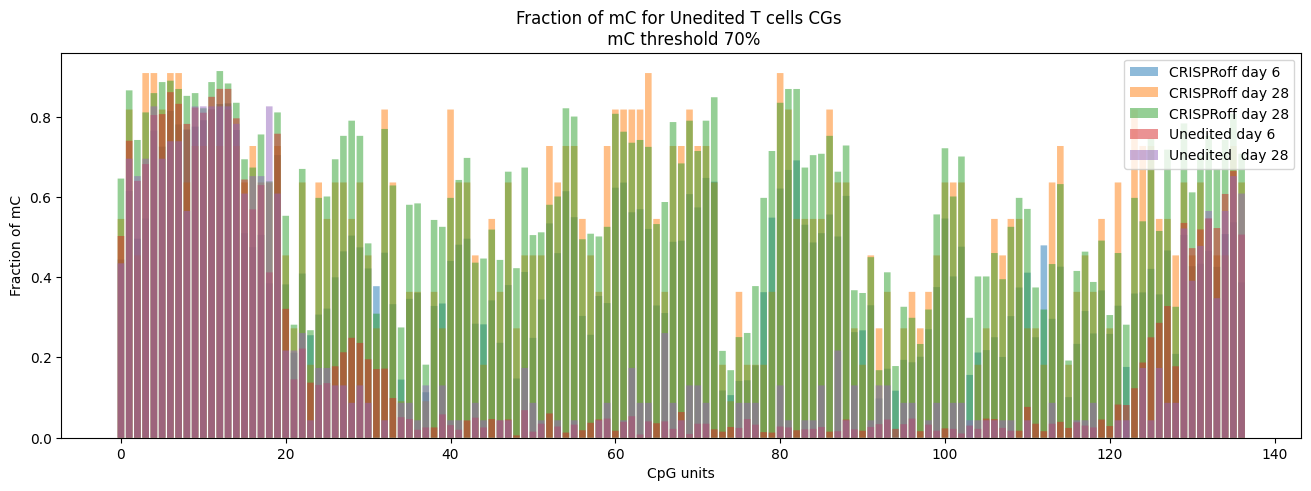

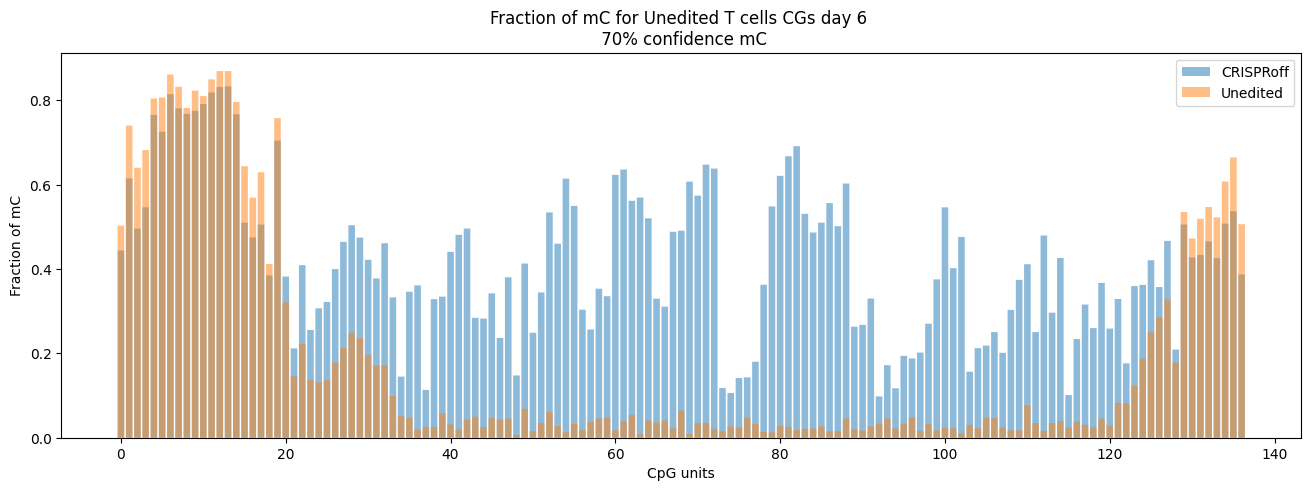

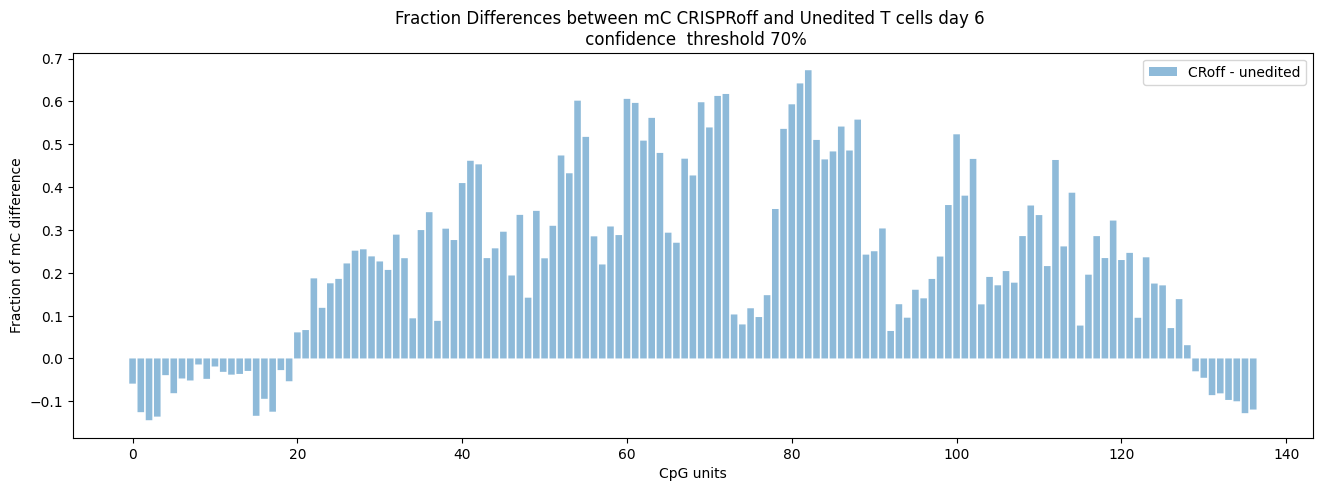

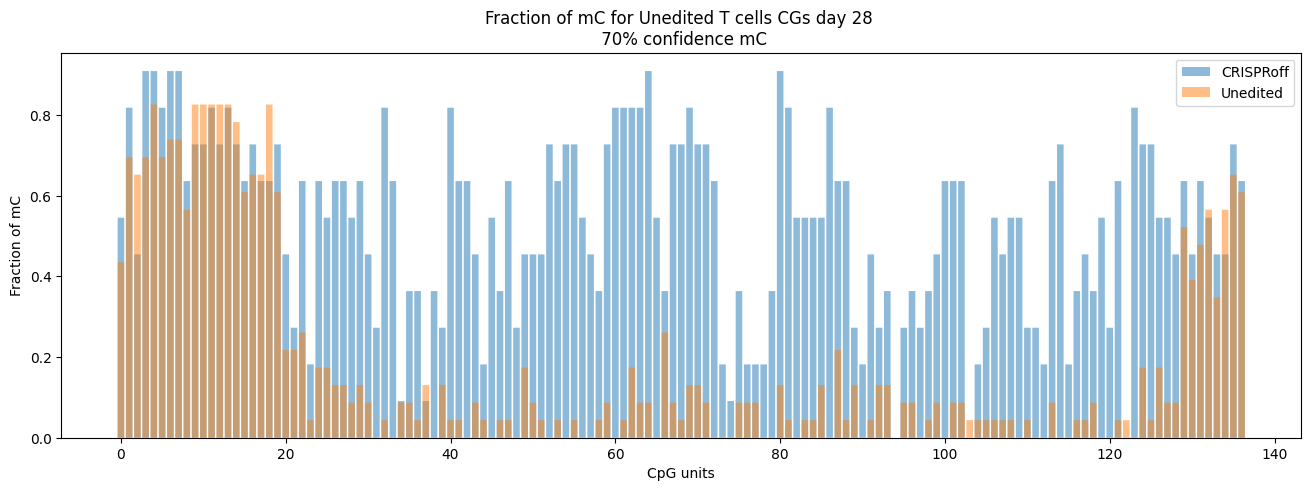

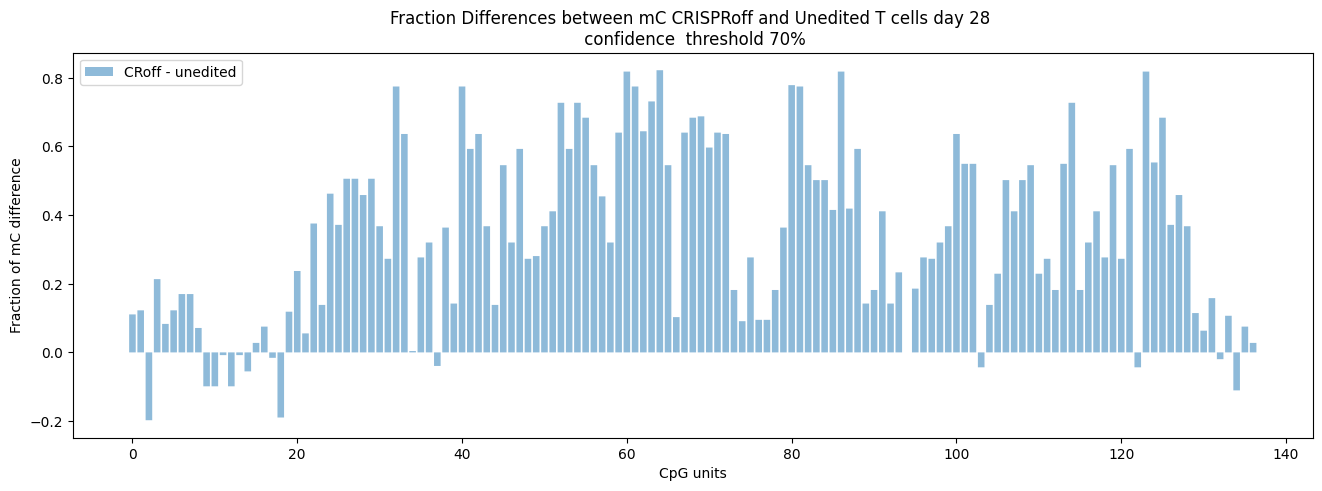

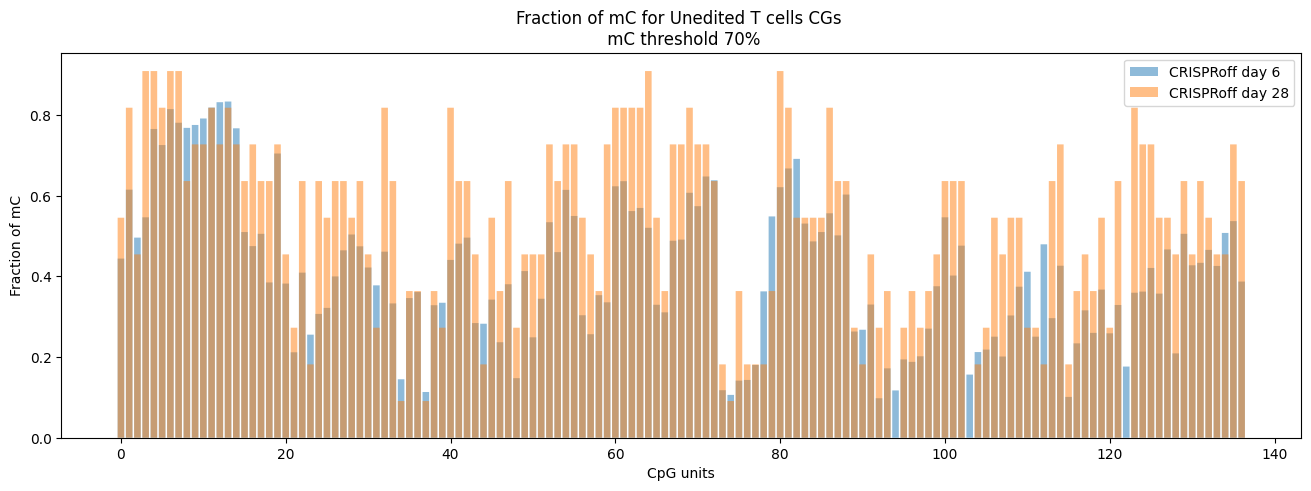

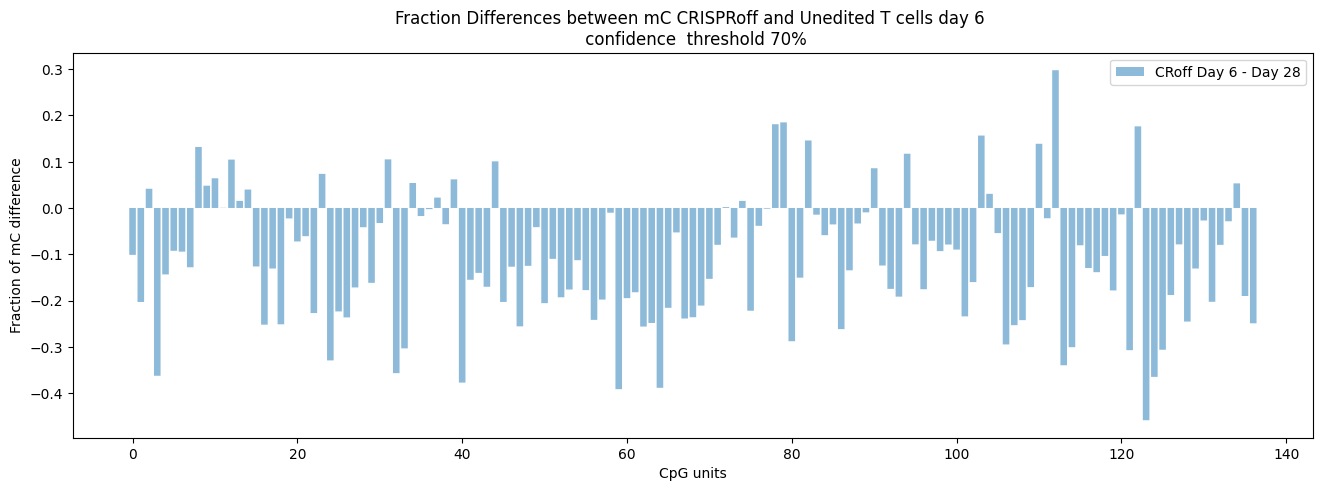

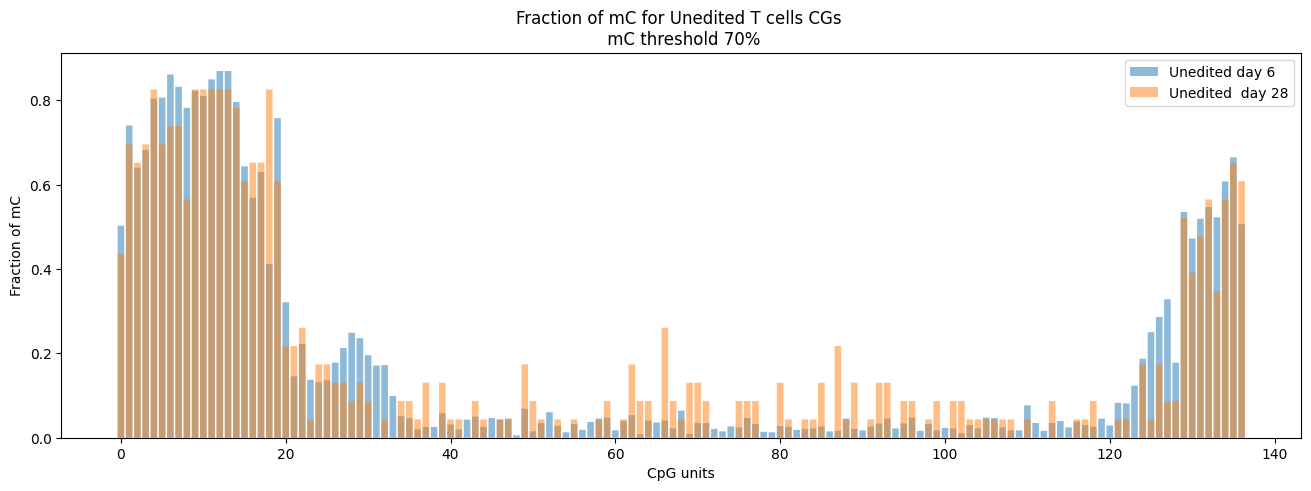

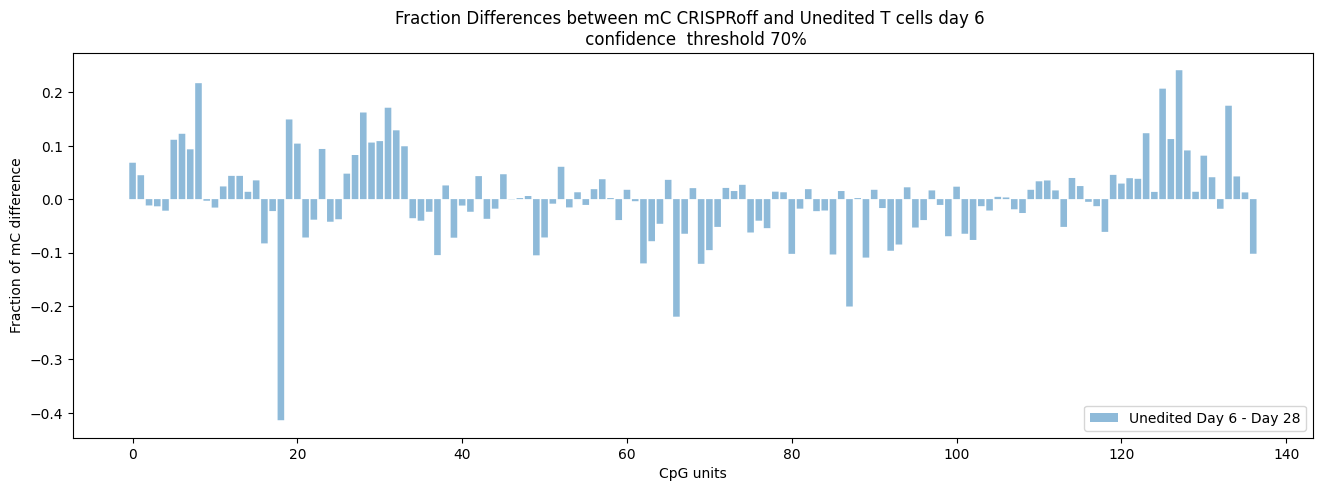

In [ ]:

CGs_pd = CGs_D6_unedited_mc07
CGs_D6_unedited_0995_remove_low70_sums = np.nansum(CGs_pd, axis=0) 
CGs_D6_unedited_0995_remove_low70_frac = CGs_D6_unedited_0995_remove_low70_sums  / len(CGs_pd) 


CGs_pd = CGs_D6_CRoff_mc07
CGs_D6_CRoff_0995_remove_low70_sums = np.nansum(CGs_pd, axis=0) 
CGs_D6_CRoff_0995_remove_low70_frac = CGs_D6_CRoff_0995_remove_low70_sums  / len(CGs_pd) 

CGs_pd = CGs_D28_unedited_mc07
CGs_D28_unedited_0995_remove_low70_sums = np.nansum(CGs_pd, axis=0) 
CGs_D28_unedited_0995_remove_low70_frac = CGs_D28_unedited_0995_remove_low70_sums  / len(CGs_pd) 


CGs_pd = CGs_D28_CRoff_mc07
CGs_D28_CRoff_0995_remove_low70_sums = np.nansum(CGs_pd, axis=0) 
CGs_D28_CRoff_0995_remove_low70_frac = CGs_D28_CRoff_0995_remove_low70_sums  / len(CGs_pd) 

CGs_pd = CGs_D35_CRoff_mc07
CGs_D35_CRoff_07 = np.nansum(CGs_pd, axis=0) 
CGs_D35_CRoff_07_frac = CGs_D35_CRoff_07  / len(CGs_pd) 



# --------- ALL Together ---------------

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D6_CRoff_0995_remove_low70_frac)), CGs_D6_CRoff_0995_remove_low70_frac, snap=False, alpha=0.5, label='CRISPRoff day 6')
plt.bar(np.arange(len(CGs_D28_CRoff_0995_remove_low70_frac)), CGs_D28_CRoff_0995_remove_low70_frac, snap=False, alpha=0.5, label='CRISPRoff day 28')

plt.bar(np.arange(len(CGs_D35_CRoff_07_frac)), CGs_D35_CRoff_07_frac, snap=False, alpha=0.5, label='CRISPRoff day 28')

plt.bar(np.arange(len(CGs_D6_unedited_0995_remove_low70_frac)), CGs_D6_unedited_0995_remove_low70_frac, snap=False, alpha=0.5, label='Unedited day 6')
plt.bar(np.arange(len(CGs_D28_unedited_0995_remove_low70_frac)), CGs_D28_unedited_0995_remove_low70_frac, snap=False, alpha=0.5, label='Unedited  day 28')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited T cells CGs \n mC threshold 70%')
plt.legend()
# Show the plot
plt.show()

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D6_CRoff_0995_remove_low70_frac)), CGs_D6_CRoff_0995_remove_low70_frac, snap=False, alpha=0.5, label='CRISPRoff')
plt.bar(np.arange(len(CGs_D6_unedited_0995_remove_low70_frac)), CGs_D6_unedited_0995_remove_low70_frac, snap=False, alpha=0.5, label='Unedited')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited T cells CGs day 6 \n 70% confidence mC')
plt.legend()
# Show the plot
plt.show()

# DIFFERENCES
dif_mCthresh_CRoff_unedit_0995 = CGs_D6_CRoff_0995_remove_low70_frac - CGs_D6_unedited_0995_remove_low70_frac

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_mCthresh_CRoff_unedit_0995)), dif_mCthresh_CRoff_unedit_0995, snap=False, alpha=0.5, label='CRoff - unedited' )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC CRISPRoff and Unedited T cells day 6 \n confidence  threshold 70%')
plt.legend()

# Show the plot
plt.show()

# ----
plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D28_CRoff_0995_remove_low70_frac)), CGs_D28_CRoff_0995_remove_low70_frac, snap=False, alpha=0.5, label='CRISPRoff')
plt.bar(np.arange(len(CGs_D28_unedited_0995_remove_low70_frac)), CGs_D28_unedited_0995_remove_low70_frac, snap=False, alpha=0.5, label='Unedited')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited T cells CGs day 28 \n 70% confidence mC')
plt.legend()
# Show the plot
plt.show()

# DIFFERENCES
dif_mCthresh_CRoff_unedit_0995 = CGs_D28_CRoff_0995_remove_low70_frac - CGs_D28_unedited_0995_remove_low70_frac

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_mCthresh_CRoff_unedit_0995)), dif_mCthresh_CRoff_unedit_0995, snap=False, alpha=0.5, label='CRoff - unedited' )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC CRISPRoff and Unedited T cells day 28 \n confidence  threshold 70%')
plt.legend()

# Show the plot
plt.show()

# =====

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D6_CRoff_0995_remove_low70_frac)), CGs_D6_CRoff_0995_remove_low70_frac, snap=False, alpha=0.5, label='CRISPRoff day 6')
plt.bar(np.arange(len(CGs_D28_CRoff_0995_remove_low70_frac)), CGs_D28_CRoff_0995_remove_low70_frac, snap=False, alpha=0.5, label='CRISPRoff day 28')
# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited T cells CGs \n mC threshold 70%')
plt.legend()
# Show the plot
plt.show()



# DIFFERENCES
dif_mCthresh_CRoff_D6_D28_0995 = CGs_D6_CRoff_0995_remove_low70_frac - CGs_D28_CRoff_0995_remove_low70_frac
plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_mCthresh_CRoff_D6_D28_0995)), dif_mCthresh_CRoff_D6_D28_0995, snap=False, alpha=0.5, label='CRoff Day 6 - Day 28' )
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC CRISPRoff and Unedited T cells day 6 \n confidence  threshold 70%')
plt.legend()

# Show the plot
plt.show()

## =--------- UNEDITED Day 6 vs Day 28

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D6_unedited_0995_remove_low70_frac)), CGs_D6_unedited_0995_remove_low70_frac, snap=False, alpha=0.5, label='Unedited day 6')
plt.bar(np.arange(len(CGs_D28_unedited_0995_remove_low70_frac)), CGs_D28_unedited_0995_remove_low70_frac, snap=False, alpha=0.5, label='Unedited  day 28')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited T cells CGs \n mC threshold 70%')
plt.legend()
# Show the plot
plt.show()




# DIFFERENCES
dif_mCthresh_unedited_D6_D28_0995 = CGs_D6_unedited_0995_remove_low70_frac - CGs_D28_unedited_0995_remove_low70_frac
plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_mCthresh_unedited_D6_D28_0995)), dif_mCthresh_unedited_D6_D28_0995, snap=False, alpha=0.5, label='Unedited Day 6 - Day 28' )
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC CRISPRoff and Unedited T cells day 6 \n confidence  threshold 70%')
plt.legend()




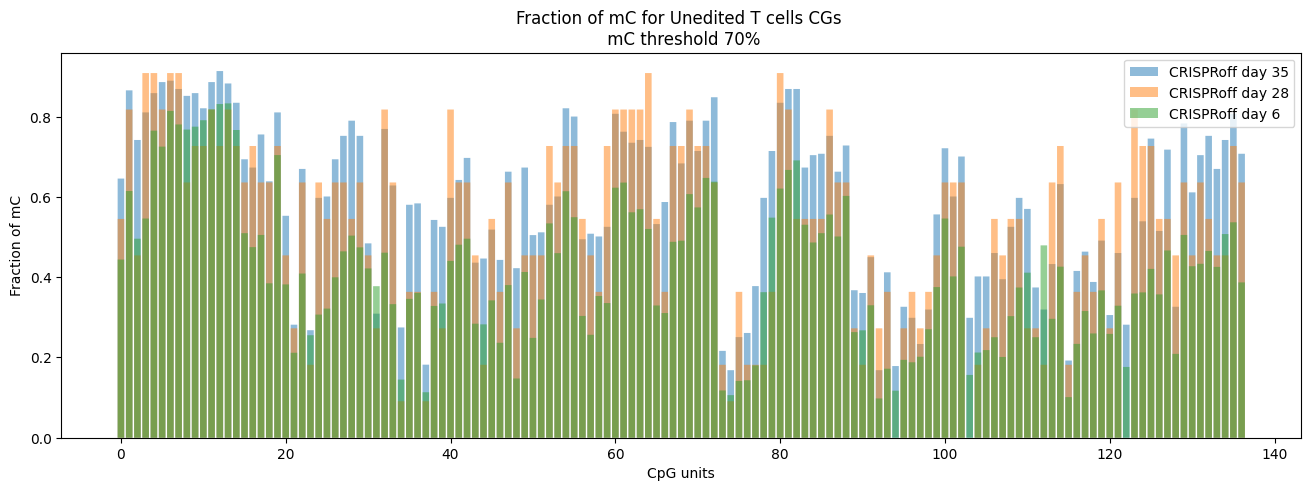

In [31]:

# --------- ALL Together ---------------

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D35_CRoff_07_frac)), CGs_D35_CRoff_07_frac, snap=False, alpha=0.5, label='CRISPRoff day 35')

plt.bar(np.arange(len(CGs_D28_CRoff_0995_remove_low70_frac)), CGs_D28_CRoff_0995_remove_low70_frac, snap=False, alpha=0.5, label='CRISPRoff day 28')

plt.bar(np.arange(len(CGs_D6_CRoff_0995_remove_low70_frac)), CGs_D6_CRoff_0995_remove_low70_frac, snap=False, alpha=0.5, label='CRISPRoff day 6')


# plt.bar(np.arange(len(CGs_D6_unedited_0995_remove_low70_frac)), CGs_D6_unedited_0995_remove_low70_frac, snap=False, alpha=0.5, label='Unedited day 6')
# plt.bar(np.arange(len(CGs_D28_unedited_0995_remove_low70_frac)), CGs_D28_unedited_0995_remove_low70_frac, snap=False, alpha=0.5, label='Unedited  day 28')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited T cells CGs \n mC threshold 70%')
plt.legend()
# Show the plot
plt.show()


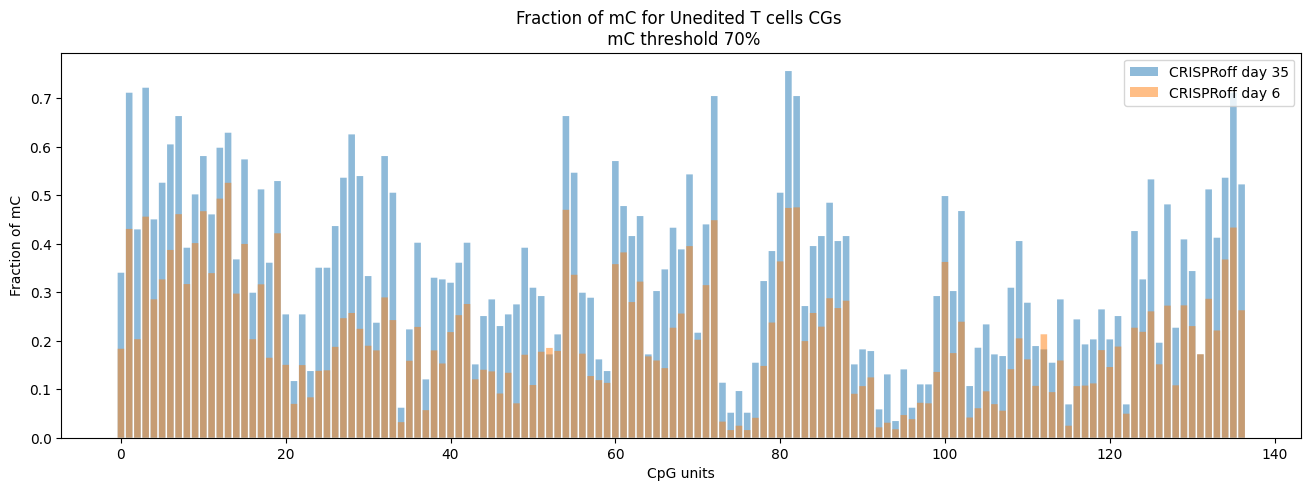

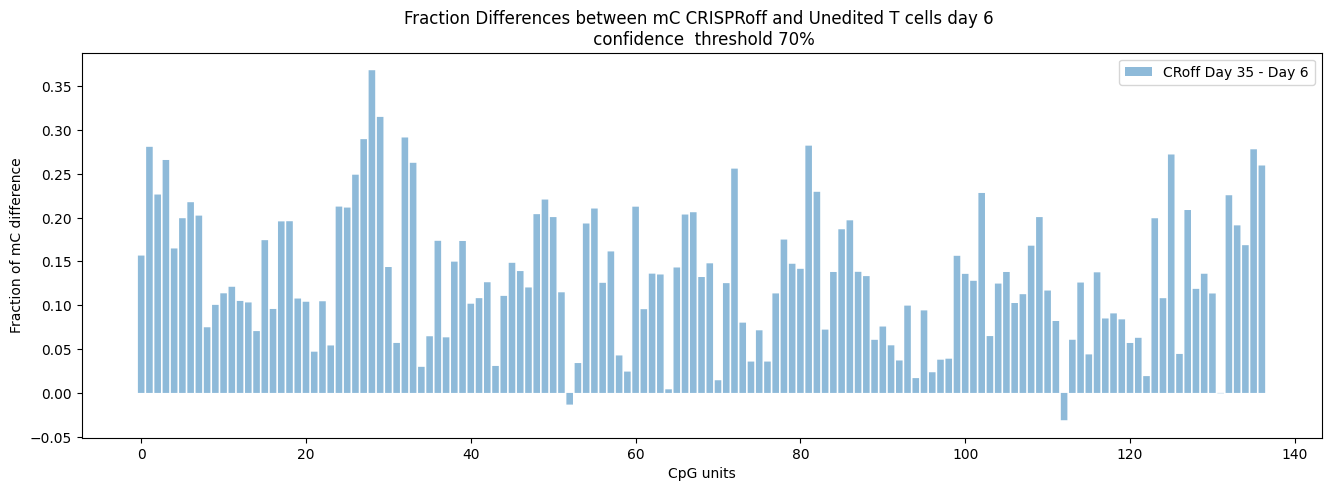

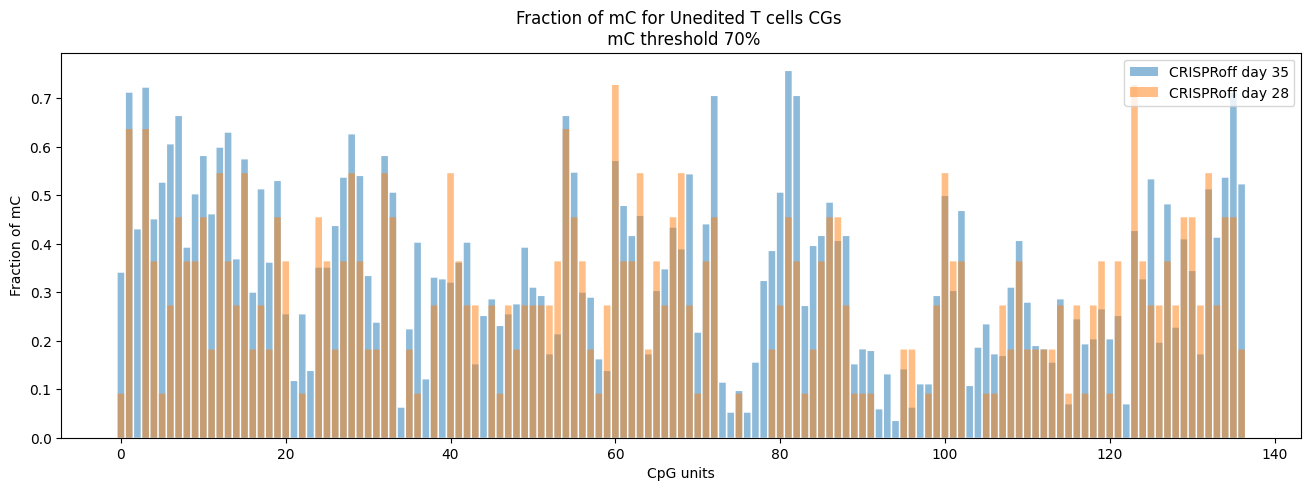

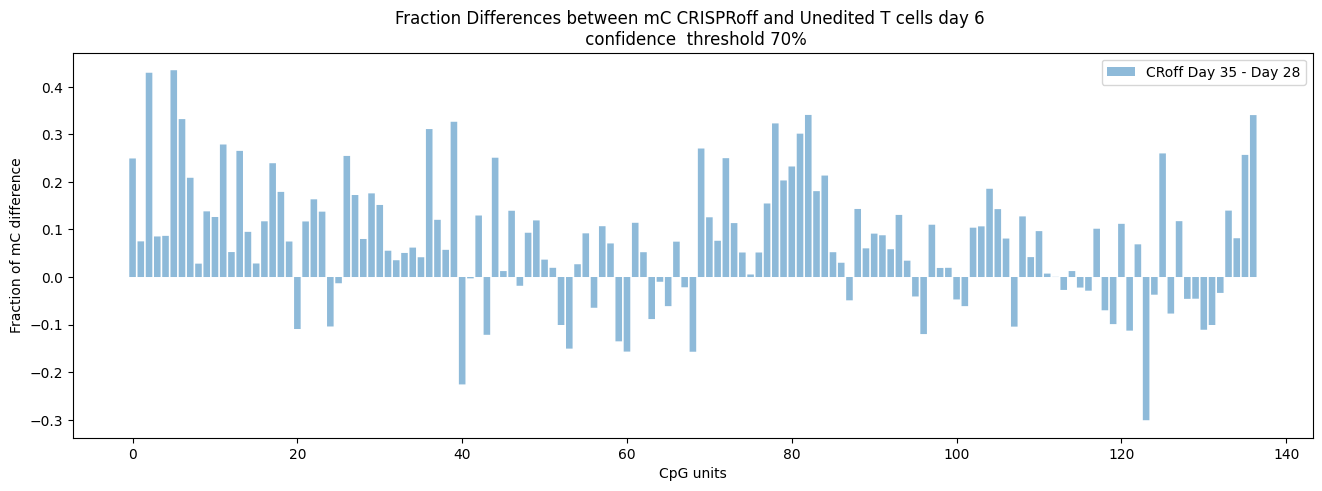

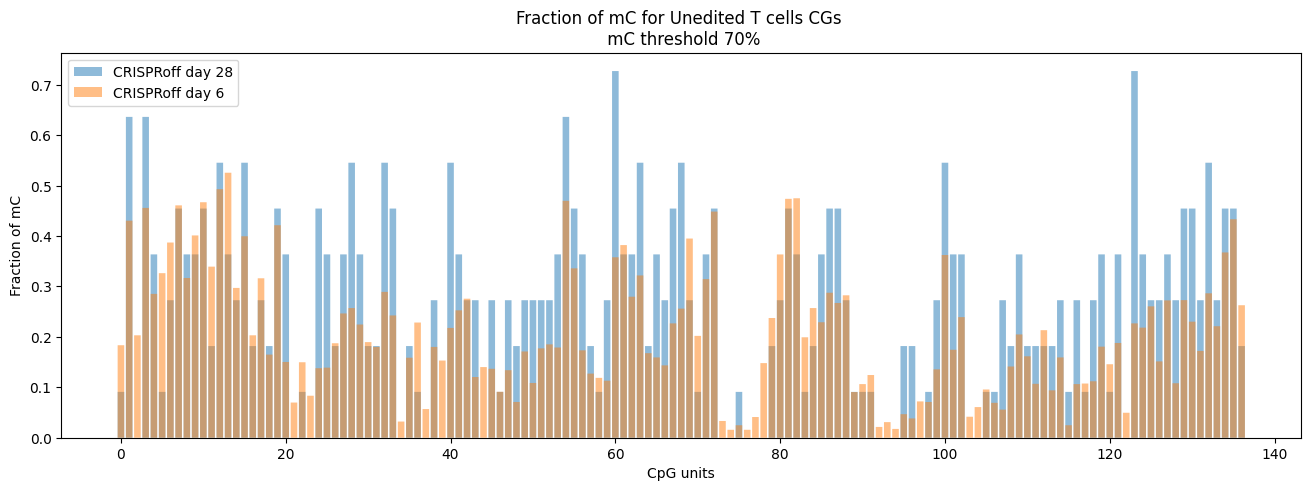

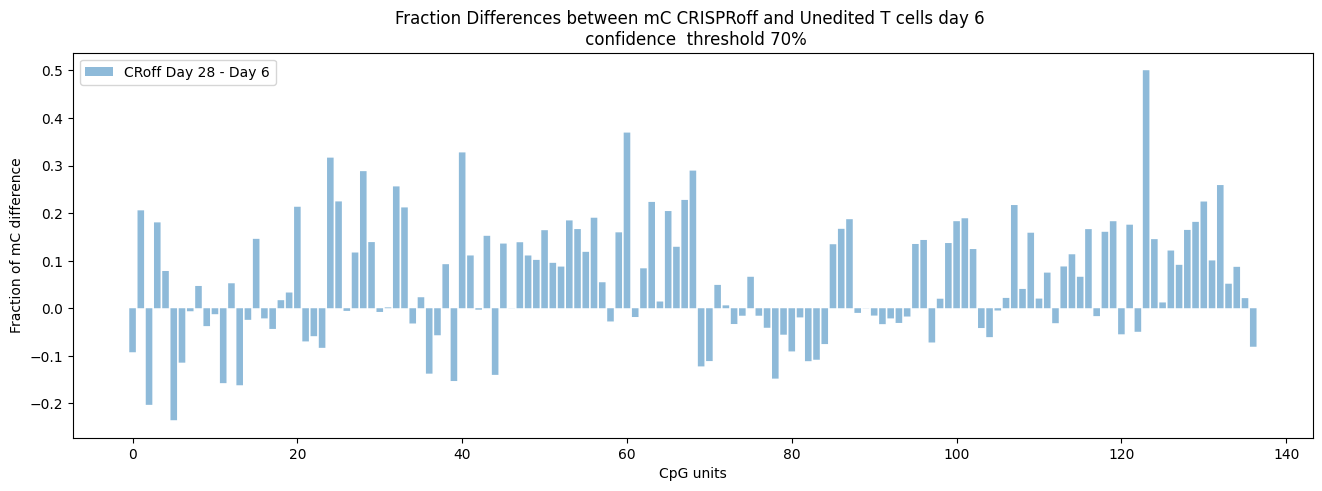

In [44]:
# Day 35 vs Day 6
plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D35_CRoff_0995_remove_low70_frac)), CGs_D35_CRoff_0995_remove_low70_frac, snap=False, alpha=0.5, label='CRISPRoff day 35')
plt.bar(np.arange(len(CGs_D6_CRoff_0995_remove_low70_frac)), CGs_D6_CRoff_0995_remove_low70_frac, snap=False, alpha=0.5, label='CRISPRoff day 6')
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited T cells CGs \n mC threshold 70%')
plt.legend()
plt.show()
# DIFFERENCES
dif_mCthresh_CRoff_D6_D28_0995 = CGs_D35_CRoff_0995_remove_low70_frac - CGs_D6_CRoff_0995_remove_low70_frac
plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_mCthresh_CRoff_D6_D28_0995)), dif_mCthresh_CRoff_D6_D28_0995, snap=False, alpha=0.5, label='CRoff Day 35 - Day 6' )
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC CRISPRoff and Unedited T cells day 6 \n confidence  threshold 70%')
plt.legend()
plt.show()


# Day 35 vs Day 28
plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D35_CRoff_0995_remove_low70_frac)), CGs_D35_CRoff_0995_remove_low70_frac, snap=False, alpha=0.5, label='CRISPRoff day 35')
plt.bar(np.arange(len(CGs_D28_CRoff_0995_remove_low70_frac)), CGs_D28_CRoff_0995_remove_low70_frac, snap=False, alpha=0.5, label='CRISPRoff day 28')
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited T cells CGs \n mC threshold 70%')
plt.legend()
plt.show()
# DIFFERENCES
dif_mCthresh_CRoff_D6_D28_0995 = CGs_D35_CRoff_0995_remove_low70_frac - CGs_D28_CRoff_0995_remove_low70_frac
plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_mCthresh_CRoff_D6_D28_0995)), dif_mCthresh_CRoff_D6_D28_0995, snap=False, alpha=0.5, label='CRoff Day 35 - Day 28' )
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC CRISPRoff and Unedited T cells day 6 \n confidence  threshold 70%')
plt.legend()
plt.show() 

# Day 28 vs Day 6
plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D28_CRoff_0995_remove_low70_frac)), CGs_D28_CRoff_0995_remove_low70_frac, snap=False, alpha=0.5, label='CRISPRoff day 28')
plt.bar(np.arange(len(CGs_D6_CRoff_0995_remove_low70_frac)), CGs_D6_CRoff_0995_remove_low70_frac, snap=False, alpha=0.5, label='CRISPRoff day 6')
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited T cells CGs \n mC threshold 70%')
plt.legend()
plt.show()
# DIFFERENCES
dif_mCthresh_CRoff_D6_D28_0995 = CGs_D28_CRoff_0995_remove_low70_frac - CGs_D6_CRoff_0995_remove_low70_frac
plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_mCthresh_CRoff_D6_D28_0995)), dif_mCthresh_CRoff_D6_D28_0995, snap=False, alpha=0.5, label='CRoff Day 28 - Day 6' )
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC CRISPRoff and Unedited T cells day 6 \n confidence  threshold 70%')
plt.legend()
plt.show() 


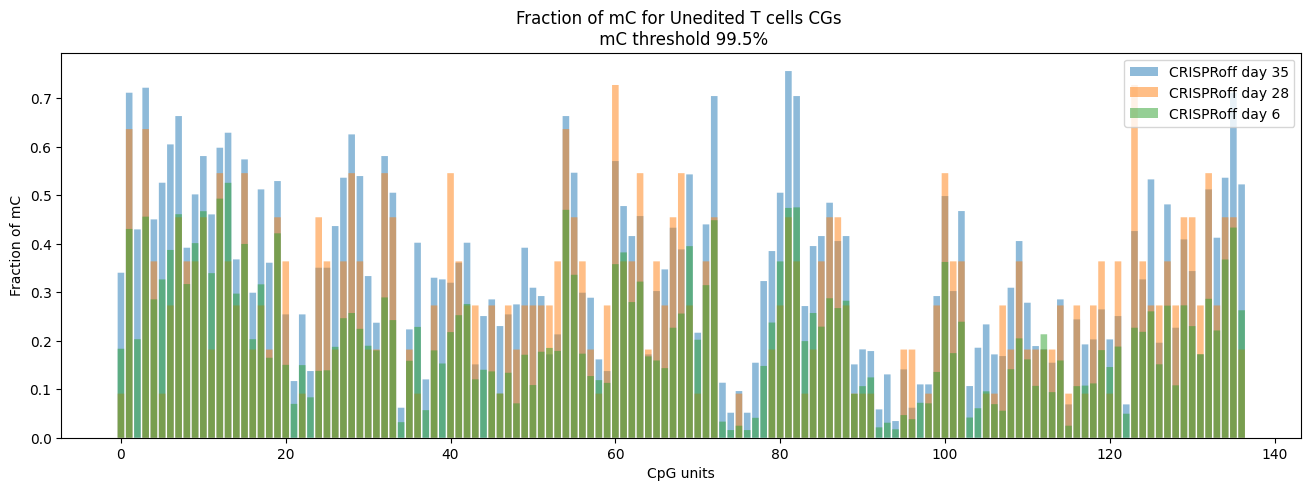

In [35]:
CGs_pd = CGs_D6_unedited_mc0995
CGs_D6_unedited_0995_remove_low70_sums = np.nansum(CGs_pd, axis=0) 
CGs_D6_unedited_0995_remove_low70_frac = CGs_D6_unedited_0995_remove_low70_sums  / len(CGs_pd) 


CGs_pd = CGs_D6_CRoff_mc0995
CGs_D6_CRoff_0995_remove_low70_sums = np.nansum(CGs_pd, axis=0) 
CGs_D6_CRoff_0995_remove_low70_frac = CGs_D6_CRoff_0995_remove_low70_sums  / len(CGs_pd) 

CGs_pd = CGs_D28_unedited_mc0995
CGs_D28_unedited_0995_remove_low70_sums = np.nansum(CGs_pd, axis=0) 
CGs_D28_unedited_0995_remove_low70_frac = CGs_D28_unedited_0995_remove_low70_sums  / len(CGs_pd) 


CGs_pd = CGs_D28_CRoff_mc0995
CGs_D28_CRoff_0995_remove_low70_sums = np.nansum(CGs_pd, axis=0) 
CGs_D28_CRoff_0995_remove_low70_frac = CGs_D28_CRoff_0995_remove_low70_sums  / len(CGs_pd) 


CGs_pd = CGs_D35_CRoff_mc0995
CGs_D35_CRoff_0995_remove_low70_sums = np.nansum(CGs_pd, axis=0) 
CGs_D35_CRoff_0995_remove_low70_frac = CGs_D35_CRoff_0995_remove_low70_sums  / len(CGs_pd) 



# --------- ALL Together ---------------

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D35_CRoff_0995_remove_low70_frac)), CGs_D35_CRoff_0995_remove_low70_frac, snap=False, alpha=0.5, label='CRISPRoff day 35')
plt.bar(np.arange(len(CGs_D28_CRoff_0995_remove_low70_frac)), CGs_D28_CRoff_0995_remove_low70_frac, snap=False, alpha=0.5, label='CRISPRoff day 28')
plt.bar(np.arange(len(CGs_D6_CRoff_0995_remove_low70_frac)), CGs_D6_CRoff_0995_remove_low70_frac, snap=False, alpha=0.5, label='CRISPRoff day 6')
 
# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited T cells CGs \n mC threshold 99.5%')
plt.legend()
# Show the plot
plt.show()


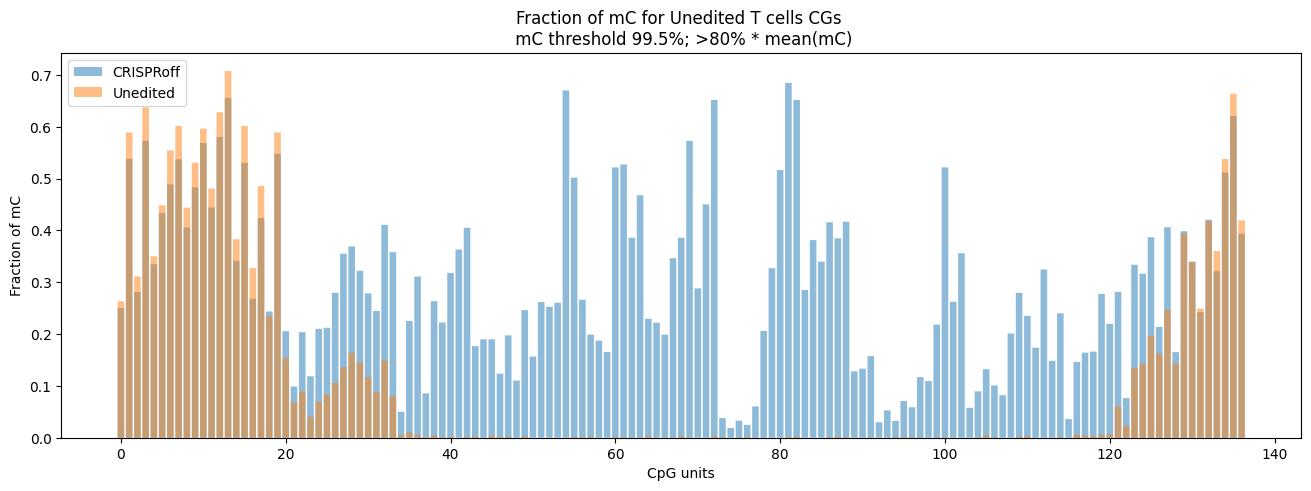

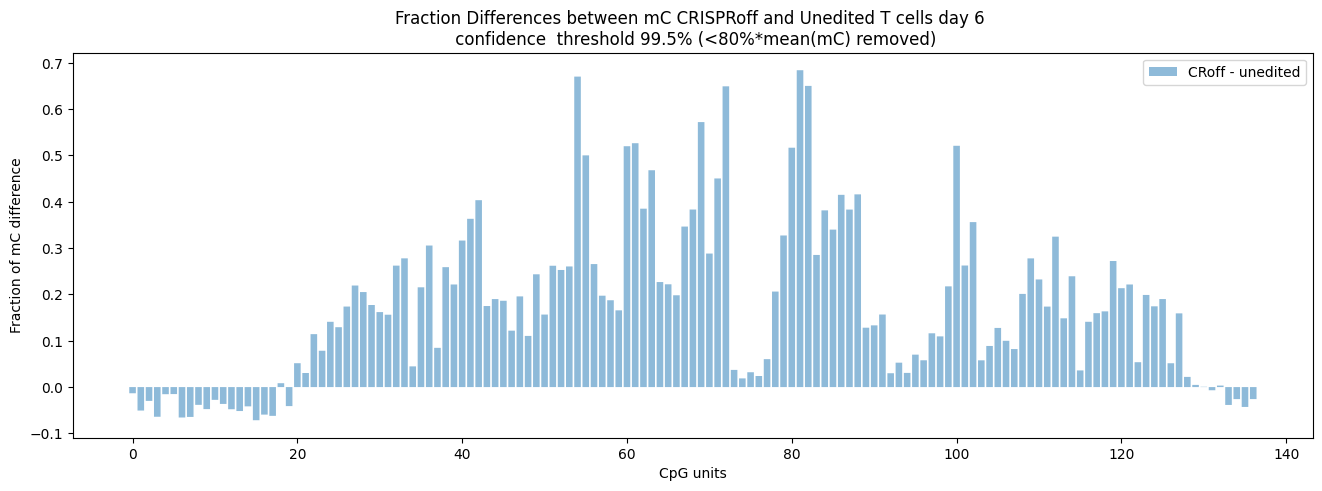

In [ ]:
# CGs_D6_pd = CGs_D6_unedited_mc0995_remove_low80
# CGs_D6_unedited_0995_remove_low80_sums = np.nansum(CGs_D6_pd, axis=0) 
# CGs_D6_unedited_0995_remove_low80_frac = CGs_D6_unedited_0995_remove_low80_sums  / len(CGs_D6_pd) 

# CGs_D6_pd = CGs_D6_CRoff_mc0995_remove_low80
# CGs_D6_CRoff_0995_remove_low80_sums = np.nansum(CGs_D6_pd, axis=0) 
# CGs_D6_CRoff_0995_remove_low80_frac = CGs_D6_CRoff_0995_remove_low80_sums  / len(CGs_D6_pd) 

# plt.figure(figsize=(16, 5))
# plt.bar(np.arange(len(CGs_D6_CRoff_0995_remove_low80_frac)), CGs_D6_CRoff_0995_remove_low80_frac, snap=False, alpha=0.5, label='CRISPRoff')
# plt.bar(np.arange(len(CGs_D6_unedited_0995_remove_low80_frac)), CGs_D6_unedited_0995_remove_low80_frac, snap=False, alpha=0.5, label='Unedited')

# # Add labels and title
# plt.xlabel('CpG units')
# plt.ylabel('Fraction of mC')
# plt.title('Fraction of mC for Unedited T cells CGs \n mC threshold 99.5%; >80% * mean(mC)')
# plt.legend()
# # Show the plot
# plt.show()

# # DIFFERENCES

# dif_mCthresh_CRoff_unedit_0995 = CGs_D6_CRoff_0995_remove_low80_frac - CGs_D6_unedited_0995_remove_low80_frac

# plt.figure(figsize=(16, 5))
# plt.bar(np.arange(len(dif_mCthresh_CRoff_unedit_0995)), dif_mCthresh_CRoff_unedit_0995, snap=False, alpha=0.5, label='CRoff - unedited' )

# # Add labels and title
# plt.xlabel('CpG units')
# plt.ylabel('Fraction of mC difference')
# plt.title('Fraction Differences between mC CRISPRoff and Unedited T cells day 6 \n confidence  threshold 99.5% (<80%*mean(mC) removed)')
# plt.legend()

# # Show the plot
# plt.show()

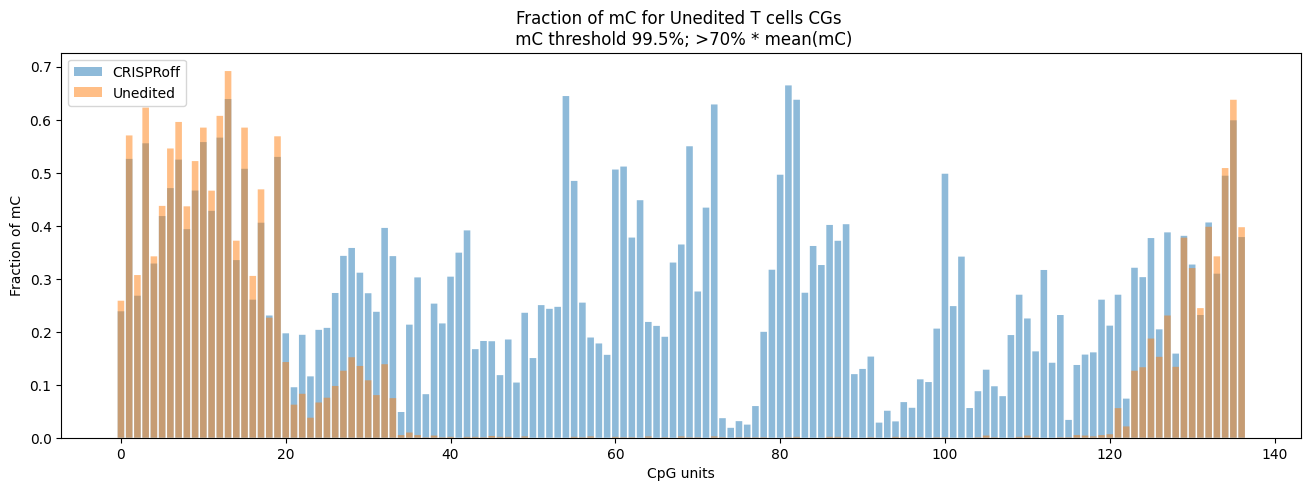

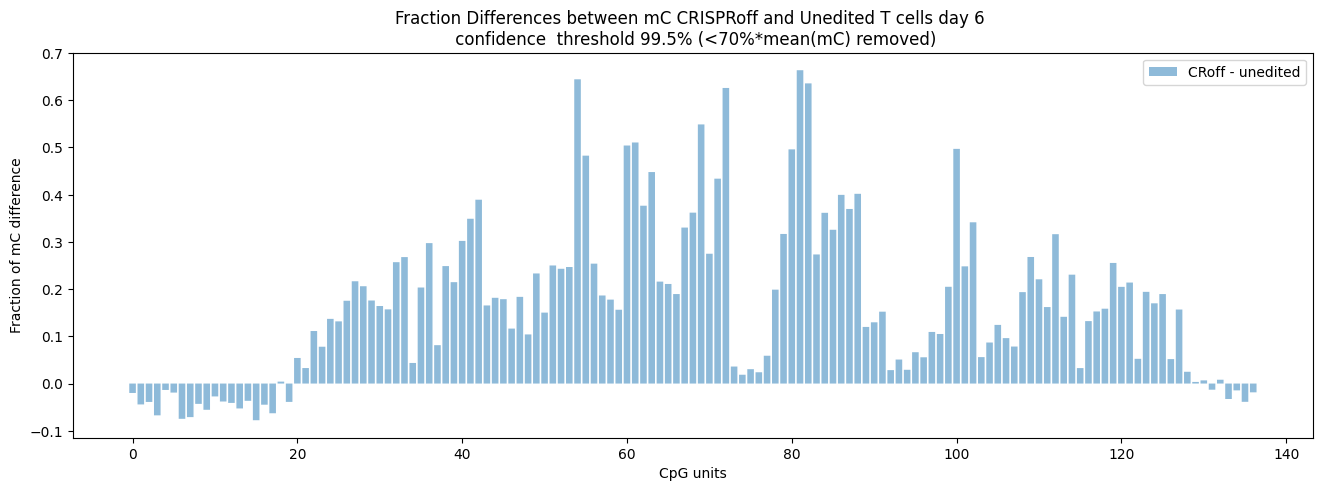

In [ ]:
# CGs_D6_pd = CGs_D6_unedited_mc0995_remove_low70
# CGs_D6_unedited_0995_remove_low70_sums = np.nansum(CGs_D6_pd, axis=0) 
# CGs_D6_unedited_0995_remove_low70_frac = CGs_D6_unedited_0995_remove_low70_sums  / len(CGs_D6_pd) 

# CGs_D6_pd = CGs_D6_CRoff_mc0995_remove_low70
# CGs_D6_CRoff_0995_remove_low70_sums = np.nansum(CGs_D6_pd, axis=0) 
# CGs_D6_CRoff_0995_remove_low70_frac = CGs_D6_CRoff_0995_remove_low70_sums  / len(CGs_D6_pd) 

# plt.figure(figsize=(16, 5))
# plt.bar(np.arange(len(CGs_D6_CRoff_0995_remove_low70_frac)), CGs_D6_CRoff_0995_remove_low70_frac, snap=False, alpha=0.5, label='CRISPRoff')
# plt.bar(np.arange(len(CGs_D6_unedited_0995_remove_low70_frac)), CGs_D6_unedited_0995_remove_low70_frac, snap=False, alpha=0.5, label='Unedited')

# # Add labels and title
# plt.xlabel('CpG units')
# plt.ylabel('Fraction of mC')
# plt.title('Fraction of mC for Unedited T cells CGs \n mC threshold 99.5%; >70% * mean(mC)')
# plt.legend()
# # Show the plot
# plt.show()

# # DIFFERENCES
# dif_mCthresh_CRoff_unedit_0995 = CGs_D6_CRoff_0995_remove_low70_frac - CGs_D6_unedited_0995_remove_low70_frac

# plt.figure(figsize=(16, 5))
# plt.bar(np.arange(len(dif_mCthresh_CRoff_unedit_0995)), dif_mCthresh_CRoff_unedit_0995, snap=False, alpha=0.5, label='CRoff - unedited' )

# # Add labels and title
# plt.xlabel('CpG units')
# plt.ylabel('Fraction of mC difference')
# plt.title('Fraction Differences between mC CRISPRoff and Unedited T cells day 6 \n confidence  threshold 99.5% (<70%*mean(mC) removed)')
# plt.legend()

# # Show the plot
# plt.show()

# Use 0.7 Confidence in mC Dorado Calls

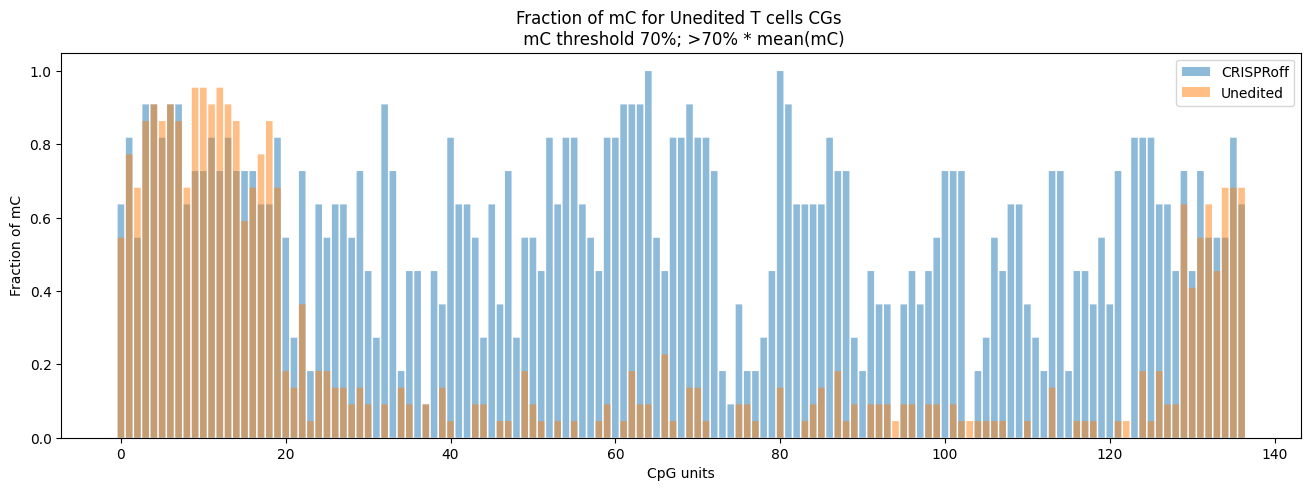

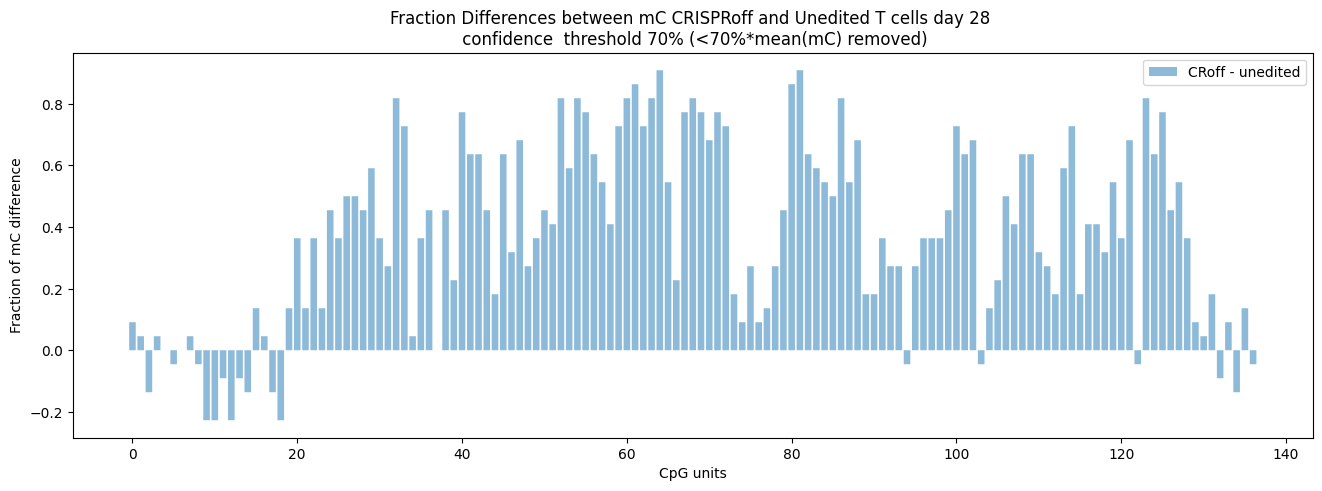

In [ ]:
# CGs_D28_pd = CGs_D28_unedited_mc07_remove_low70
# CGs_D28_unedited_07_remove_low70_sums = np.nansum(CGs_D28_pd, axis=0) 
# CGs_D28_unedited_07_remove_low70_frac = CGs_D28_unedited_07_remove_low70_sums  / len(CGs_D28_pd) 

# CGs_D28_pd = CGs_D28_CRoff_mc07_remove_low70
# CGs_D28_CRoff_07_remove_low70_sums = np.nansum(CGs_D28_pd, axis=0) 
# CGs_D28_CRoff_07_remove_low70_frac = CGs_D28_CRoff_07_remove_low70_sums  / len(CGs_D28_pd) 

# plt.figure(figsize=(16, 5))
# plt.bar(np.arange(len(CGs_D28_CRoff_07_remove_low70_frac)), CGs_D28_CRoff_07_remove_low70_frac, snap=False, alpha=0.5, label='CRISPRoff')
# plt.bar(np.arange(len(CGs_D28_unedited_07_remove_low70_frac)), CGs_D28_unedited_07_remove_low70_frac, snap=False, alpha=0.5, label='Unedited')

# # Add labels and title
# plt.xlabel('CpG units')
# plt.ylabel('Fraction of mC')
# plt.title('Fraction of mC for Unedited T cells CGs \n mC threshold 70%; >70% * mean(mC)')
# plt.legend()
# # Show the plot
# plt.show()

# # DIFFERENCES
# dif_mCthresh_CRoff_unedit_07 = CGs_D28_CRoff_07_remove_low70_frac - CGs_D28_unedited_07_remove_low70_frac

# plt.figure(figsize=(16, 5))
# plt.bar(np.arange(len(dif_mCthresh_CRoff_unedit_07)), dif_mCthresh_CRoff_unedit_07, snap=False, alpha=0.5, label='CRoff - unedited' )

# # Add labels and title
# plt.xlabel('CpG units')
# plt.ylabel('Fraction of mC difference')
# plt.title('Fraction Differences between mC CRISPRoff and Unedited T cells day 28 \n confidence  threshold 70% (<70%*mean(mC) removed)')
# plt.legend()

# # Show the plot
# plt.show()

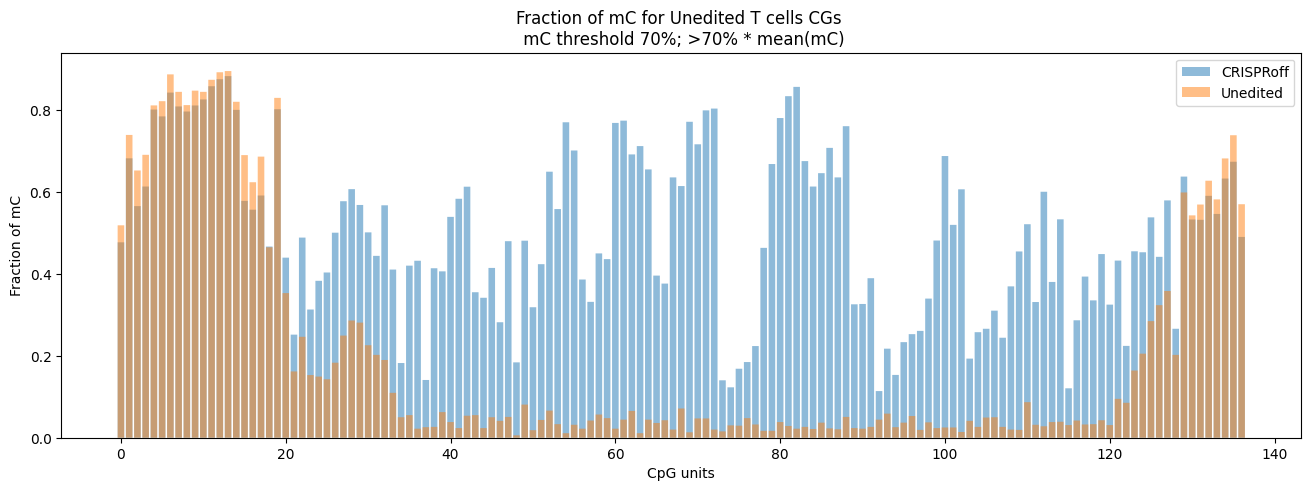

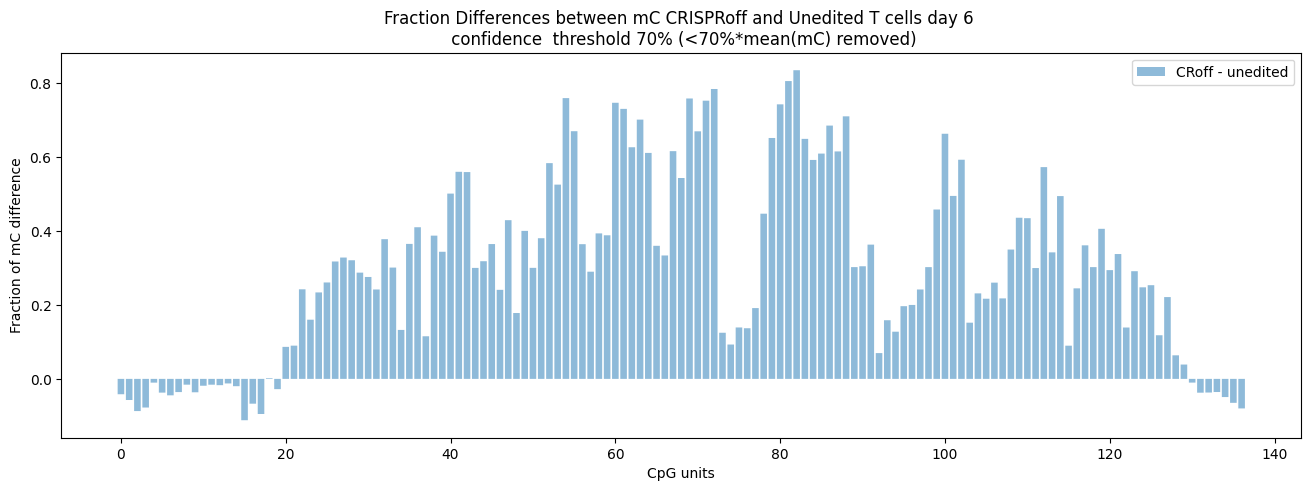

In [ ]:
# CGs_D6_pd = CGs_D6_unedited_mc07_remove_low70
# CGs_D6_unedited_07_remove_low70_sums = np.nansum(CGs_D6_pd, axis=0) 
# CGs_D6_unedited_07_remove_low70_frac = CGs_D6_unedited_07_remove_low70_sums  / len(CGs_D6_pd) 

# CGs_D6_pd = CGs_D6_CRoff_mc07_remove_low70
# CGs_D6_CRoff_07_remove_low70_sums = np.nansum(CGs_D6_pd, axis=0) 
# CGs_D6_CRoff_07_remove_low70_frac = CGs_D6_CRoff_07_remove_low70_sums  / len(CGs_D6_pd) 

# plt.figure(figsize=(16, 5))
# plt.bar(np.arange(len(CGs_D6_CRoff_07_remove_low70_frac)), CGs_D6_CRoff_07_remove_low70_frac, snap=False, alpha=0.5, label='CRISPRoff')
# plt.bar(np.arange(len(CGs_D6_unedited_07_remove_low70_frac)), CGs_D6_unedited_07_remove_low70_frac, snap=False, alpha=0.5, label='Unedited')

# # Add labels and title
# plt.xlabel('CpG units')
# plt.ylabel('Fraction of mC')
# plt.title('Fraction of mC for Unedited T cells CGs \n mC threshold 70%; >70% * mean(mC)')
# plt.legend()
# # Show the plot
# plt.show()

# # DIFFERENCES
# dif_mCthresh_CRoff_unedit_07 = CGs_D6_CRoff_07_remove_low70_frac - CGs_D6_unedited_07_remove_low70_frac

# plt.figure(figsize=(16, 5))
# plt.bar(np.arange(len(dif_mCthresh_CRoff_unedit_07)), dif_mCthresh_CRoff_unedit_07, snap=False, alpha=0.5, label='CRoff - unedited' )

# # Add labels and title
# plt.xlabel('CpG units')
# plt.ylabel('Fraction of mC difference')
# plt.title('Fraction Differences between mC CRISPRoff and Unedited T cells day 6 \n confidence  threshold 70% (<70%*mean(mC) removed)')
# plt.legend()

# # Show the plot
# plt.show()

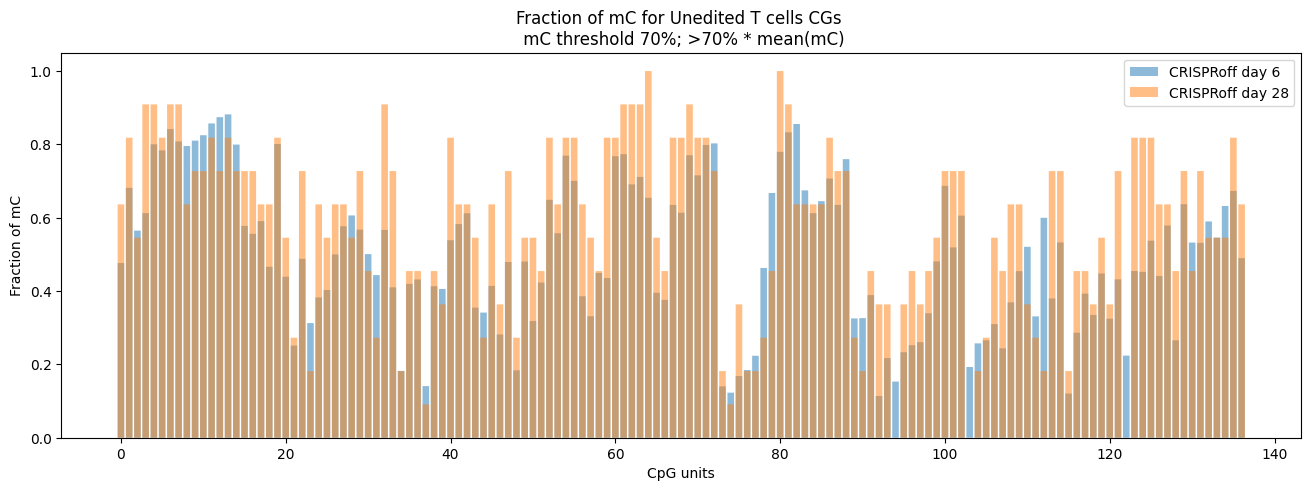

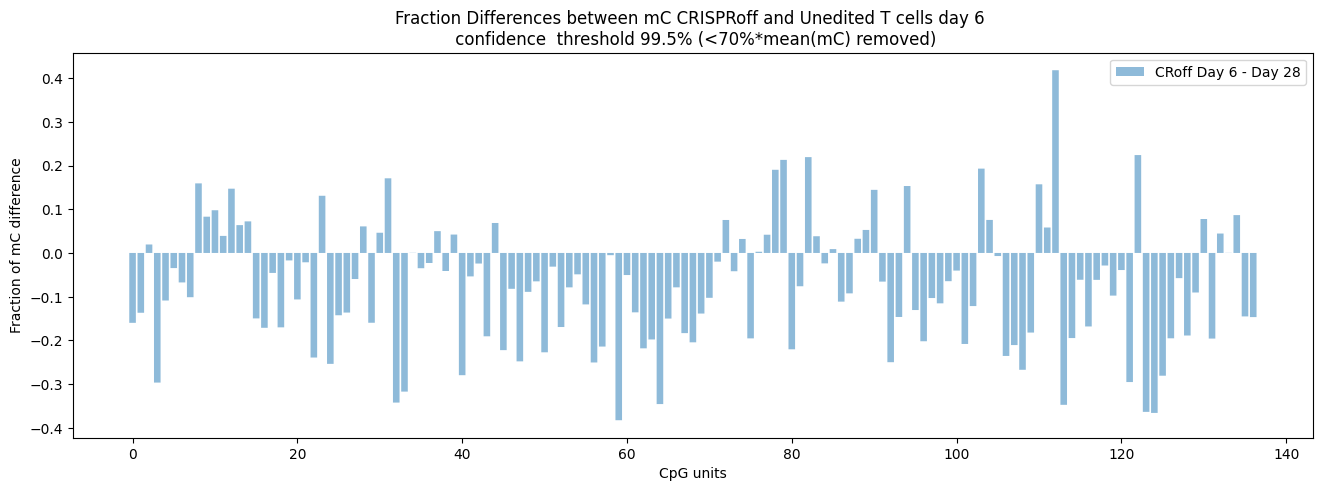

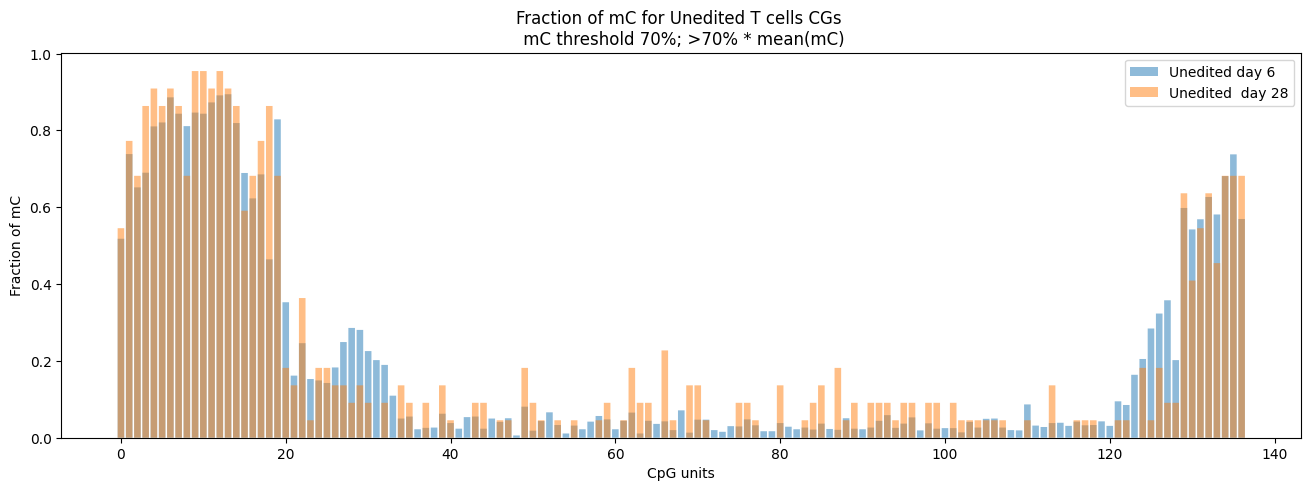

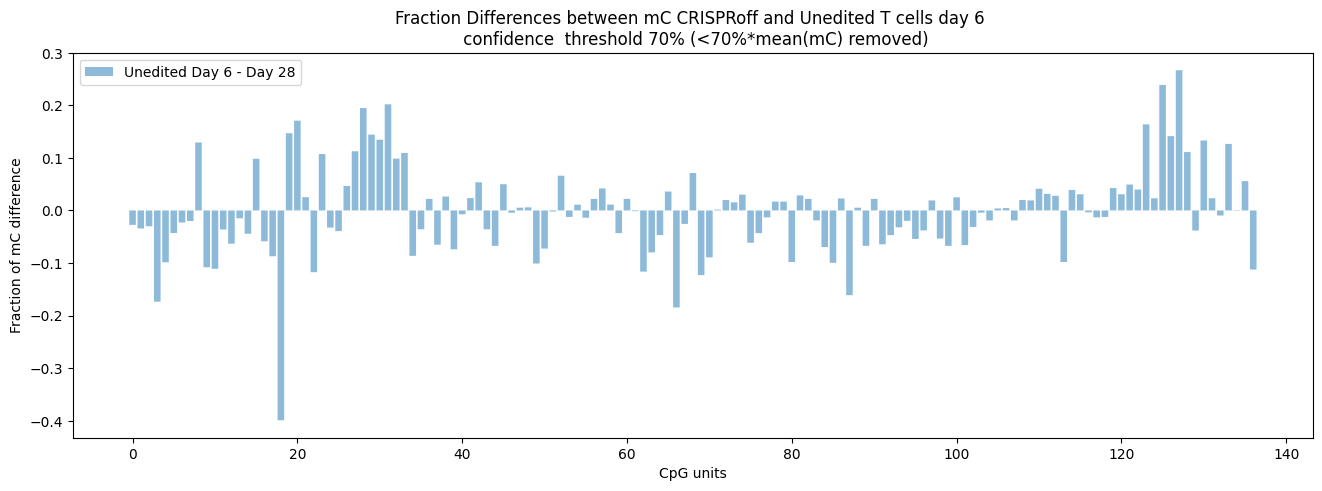

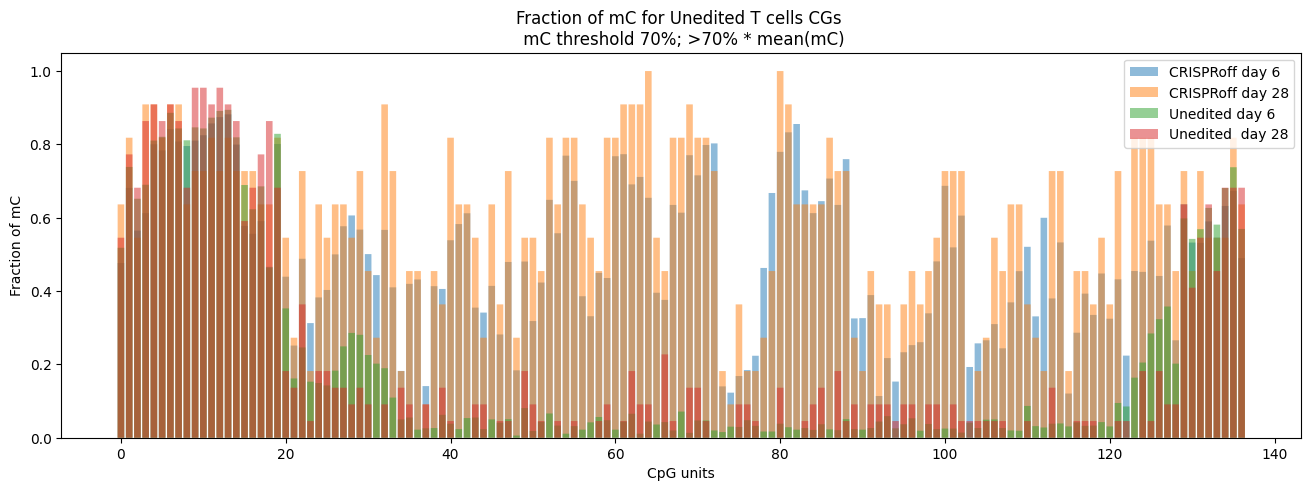

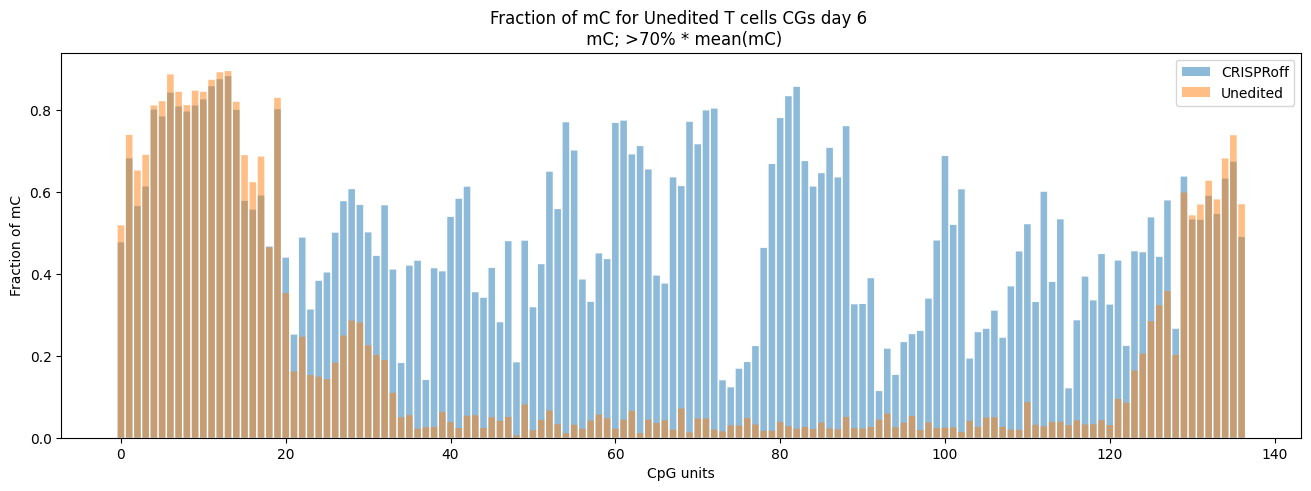

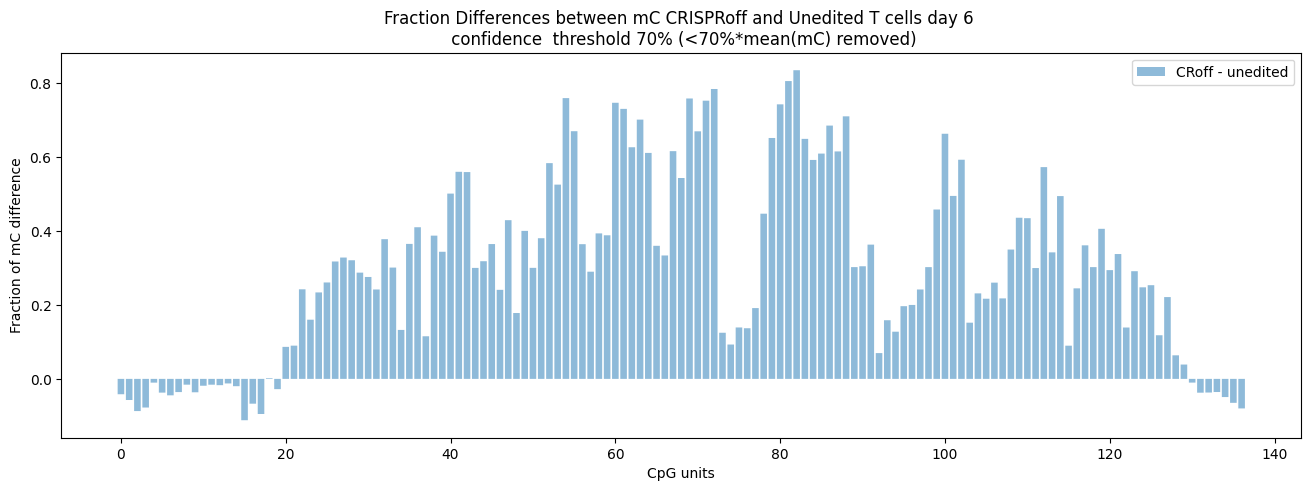

In [ ]:
# CGs_D6_pd = CGs_D6_unedited_mc07_remove_low70
# CGs_D6_unedited_07_remove_low70_sums = np.nansum(CGs_D6_pd, axis=0) 
# CGs_D6_unedited_07_remove_low70_frac = CGs_D6_unedited_07_remove_low70_sums  / len(CGs_D6_pd) 

# CGs_D6_pd = CGs_D6_CRoff_mc07_remove_low70
# CGs_D6_CRoff_07_remove_low70_sums = np.nansum(CGs_D6_pd, axis=0) 
# CGs_D6_CRoff_07_remove_low70_frac = CGs_D6_CRoff_07_remove_low70_sums  / len(CGs_D6_pd) 


# plt.figure(figsize=(16, 5))
# plt.bar(np.arange(len(CGs_D6_CRoff_07_remove_low70_frac)), CGs_D6_CRoff_07_remove_low70_frac, snap=False, alpha=0.5, label='CRISPRoff day 6')
# plt.bar(np.arange(len(CGs_D28_CRoff_07_remove_low70_frac)), CGs_D28_CRoff_07_remove_low70_frac, snap=False, alpha=0.5, label='CRISPRoff day 28')
# # Add labels and title
# plt.xlabel('CpG units')
# plt.ylabel('Fraction of mC')
# plt.title('Fraction of mC for Unedited T cells CGs \n mC threshold 70%; >70% * mean(mC)')
# plt.legend()
# # Show the plot
# plt.show()



# # DIFFERENCES
# dif_mCthresh_CRoff_D6_D28_07 = CGs_D6_CRoff_07_remove_low70_frac - CGs_D28_CRoff_07_remove_low70_frac
# plt.figure(figsize=(16, 5))
# plt.bar(np.arange(len(dif_mCthresh_CRoff_D6_D28_07)), dif_mCthresh_CRoff_D6_D28_07, snap=False, alpha=0.5, label='CRoff Day 6 - Day 28' )
# plt.xlabel('CpG units')
# plt.ylabel('Fraction of mC difference')
# plt.title('Fraction Differences between mC CRISPRoff and Unedited T cells day 6 \n confidence  threshold 99.5% (<70%*mean(mC) removed)')
# plt.legend()

# # Show the plot
# plt.show()

# ## =--------- UNEDITED Day 6 vs Day 38

# plt.figure(figsize=(16, 5))
# plt.bar(np.arange(len(CGs_D6_unedited_07_remove_low70_frac)), CGs_D6_unedited_07_remove_low70_frac, snap=False, alpha=0.5, label='Unedited day 6')
# plt.bar(np.arange(len(CGs_D28_unedited_07_remove_low70_frac)), CGs_D28_unedited_07_remove_low70_frac, snap=False, alpha=0.5, label='Unedited  day 28')

# # Add labels and title
# plt.xlabel('CpG units')
# plt.ylabel('Fraction of mC')
# plt.title('Fraction of mC for Unedited T cells CGs \n mC threshold 70%; >70% * mean(mC)')
# plt.legend()
# # Show the plot
# plt.show()




# # DIFFERENCES
# dif_mCthresh_unedited_D6_D28_07 = CGs_D6_unedited_07_remove_low70_frac - CGs_D28_unedited_07_remove_low70_frac
# plt.figure(figsize=(16, 5))
# plt.bar(np.arange(len(dif_mCthresh_unedited_D6_D28_07)), dif_mCthresh_unedited_D6_D28_07, snap=False, alpha=0.5, label='Unedited Day 6 - Day 28' )
# plt.xlabel('CpG units')
# plt.ylabel('Fraction of mC difference')
# plt.title('Fraction Differences between mC CRISPRoff and Unedited T cells day 6 \n confidence  threshold 70% (<70%*mean(mC) removed)')
# plt.legend()




# # --------- ALL Together ---------------

# plt.figure(figsize=(16, 5))
# plt.bar(np.arange(len(CGs_D6_CRoff_07_remove_low70_frac)), CGs_D6_CRoff_07_remove_low70_frac, snap=False, alpha=0.5, label='CRISPRoff day 6')
# plt.bar(np.arange(len(CGs_D28_CRoff_07_remove_low70_frac)), CGs_D28_CRoff_07_remove_low70_frac, snap=False, alpha=0.5, label='CRISPRoff day 28')

# plt.bar(np.arange(len(CGs_D6_unedited_07_remove_low70_frac)), CGs_D6_unedited_07_remove_low70_frac, snap=False, alpha=0.5, label='Unedited day 6')
# plt.bar(np.arange(len(CGs_D28_unedited_07_remove_low70_frac)), CGs_D28_unedited_07_remove_low70_frac, snap=False, alpha=0.5, label='Unedited  day 28')

# # Add labels and title
# plt.xlabel('CpG units')
# plt.ylabel('Fraction of mC')
# plt.title('Fraction of mC for Unedited T cells CGs \n mC threshold 70%; >70% * mean(mC)')
# plt.legend()
# # Show the plot
# plt.show()

# plt.figure(figsize=(16, 5))
# plt.bar(np.arange(len(CGs_D6_CRoff_07_remove_low70_frac)), CGs_D6_CRoff_07_remove_low70_frac, snap=False, alpha=0.5, label='CRISPRoff')
# plt.bar(np.arange(len(CGs_D6_unedited_07_remove_low70_frac)), CGs_D6_unedited_07_remove_low70_frac, snap=False, alpha=0.5, label='Unedited')

# # Add labels and title
# plt.xlabel('CpG units')
# plt.ylabel('Fraction of mC')
# plt.title('Fraction of mC for Unedited T cells CGs day 6 \n mC; >70% * mean(mC)')
# plt.legend()
# # Show the plot
# plt.show()

# # DIFFERENCES
# dif_mCthresh_CRoff_unedit_07 = CGs_D6_CRoff_07_remove_low70_frac - CGs_D6_unedited_07_remove_low70_frac

# plt.figure(figsize=(16, 5))
# plt.bar(np.arange(len(dif_mCthresh_CRoff_unedit_07)), dif_mCthresh_CRoff_unedit_07, snap=False, alpha=0.5, label='CRoff - unedited' )

# # Add labels and title
# plt.xlabel('CpG units')
# plt.ylabel('Fraction of mC difference')
# plt.title('Fraction Differences between mC CRISPRoff and Unedited T cells day 6 \n confidence  threshold 70% (<70%*mean(mC) removed)')
# plt.legend()

# # Show the plot
# plt.show()


